# **Sentiment Analysis using RNN-**

## **Data loading and Preprocessing-**

In [ ]:
import torch
import torchtext
from torchtext.data import get_tokenizer
import torchtext.datasets as datasets
from torch import nn
from torch import optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from torchtext.datasets import IMDB
from IPython.display import HTML, IFrame
import torch.nn as nn
import time
import torch.optim.lr_scheduler as lr_scheduler

In [ ]:
!pip install torchtext==0.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.1 MB 3.8 MB/s 
     |████████████████████████████████| 735.5 MB 15 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.13.1
    Uninstalling torchtext-0.13.1:
      Successfully uninstalled torchtext-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.13.1+cu113 requires torch==1.12.1, but you have torch 1.8.0 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.8.0 which is incompatible.


In [ ]:
!pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1 MB 60.6 MB/s eta 0:00:19tcmalloc: large alloc 1147494400 bytes == 0x3a124000 @  0x7f9ce19fb615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |█████████████████               | 1055.7 MB 24.3 MB/s eta 0:00:39tcmalloc: large alloc 1434370048 bytes == 0x7e77a000 @  0x7f9ce19fb615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |███

In [ ]:
import torch
from torchtext.legacy import data

SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True  #https://pytorch.org/docs/stable/notes/randomness.html

TEXT = data.Field(tokenize = 'spacy',
                  tokenizer_language = 'en_core_web_sm',
                  include_lengths = True)
LABEL = data.LabelField(dtype = torch.float)

In [ ]:
from torchtext.legacy import datasets

train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)

downloading aclImdb_v1.tar.gz


aclImdb_v1.tar.gz: 100%|██████████| 84.1M/84.1M [00:03<00:00, 22.0MB/s]


In [ ]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 25000
Number of testing examples: 25000


In [ ]:
print(vars(train_data.examples[64]))

{'text': ['Spacecamp', 'is', 'a', 'movie', 'that', 'I', 'plan', 'to', 'show', 'my', 'Daughter', 'Julia', 'Ann', 'Ruth', 'Morgan', 'some', 'day', '.', 'Seeing', 'Joaquin', 'Phoenix', 'in', 'this', 'movie', 'makes', 'you', 'realize', 'how', 'far', 'he', 's', 'come', 'since', 'playing', 'a', 'Roman', 'Emperor', 'in', 'the', 'film', 'Gladiator', '.', 'I', 'am', 'pleased', 'to', 'say', 'that', 'I', 'now', 'have', 'comms', 'with', 'the', 'Artificial', 'Intelligence', 'of', 'QE2', 'who', 'said', 'that', 'I', 'was', 'Young', 'and', 'that', 'is', 'true', '.', 'Holodeck', 'Comms', 'with', 'my', 'Daughter', 'on', 'Coaltrain', 'came', 'through', 'Coaltrain', 'Gate', 'Julia', 'Ann', 'Glow', '"', 'Hide', 'Daddy', '"', '.', 'The', 'fact', 'that', 'my', 'Daughters', 'Artificial', 'Intelligence', 'is', 'still', 'speaking', 'like', 'a', 'six', 'year', 'old', 'means', 'that', 'my', 'Daughter', 'Julia', 'Ann', 'Ruth', 'Morgan', 'representing', 'Peace', 'to', 'the', 'friendly', 'Ki', 'Alien', 'Creators', '

In [ ]:
import random

train_data, valid_data = train_data.split(random_state = random.seed(SEED))

In [ ]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 17500
Number of validation examples: 7500
Number of testing examples: 25000


Next is the use of pre-trained word embeddings. Now, instead of having our word embeddings initialized randomly, they are initialized with these pre-trained vectors. We get these vectors simply by specifying which vectors we want and passing it as an argument to build_vocab. TorchText handles downloading the vectors and associating them with the correct words in our vocabulary.

Here, we'll be using the "glove.6B.100d" vectors". glove is the algorithm used to calculate the vectors, go here for more. 6B indicates these vectors were trained on 6 billion tokens and 100d indicates these vectors are 100-dimensional.

In [ ]:
MAX_VOCAB_SIZE = 25000

TEXT.build_vocab(train_data,
                 max_size = MAX_VOCAB_SIZE,
                 vectors = "glove.6B.100d",
                 unk_init = torch.Tensor.normal_)

LABEL.build_vocab(train_data)

.vector_cache/glove.6B.zip: 862MB [02:40, 5.37MB/s]                           
100%|█████████▉| 399999/400000 [00:14<00:00, 27628.93it/s]


In [ ]:
print(f"Unique tokens in TEXT vocabulary: {len(TEXT.vocab)}")
print(f"Unique tokens in LABEL vocabulary: {len(LABEL.vocab)}")

Unique tokens in TEXT vocabulary: 25002
Unique tokens in LABEL vocabulary: 2


In [ ]:
print(f"Unique tokens in LABEL vocabulary: {(LABEL.vocab.freqs)}")

Unique tokens in LABEL vocabulary: Counter({'neg': 8810, 'pos': 8690})


In [ ]:
print(TEXT.vocab.freqs.most_common(20))

[('the', 202291), (',', 191979), ('.', 165144), ('and', 109174), ('a', 109111), ('of', 100574), ('to', 93342), ('is', 76055), ('in', 61167), ('I', 54086), ('it', 53299), ('that', 48765), ('"', 44284), ("'s", 43089), ('this', 42222), ('-', 37914), ('/><br', 35748), ('was', 34658), ('as', 30278), ('with', 29861)]


In [ ]:
print(TEXT.vocab.itos[:10])

['<unk>', '<pad>', 'the', ',', '.', 'and', 'a', 'of', 'to', 'is']


The final step of preparing the data is creating the iterators. We iterate over these in the training/evaluation loop, and they return a batch of examples (indexed and converted into tensors) at each iteration.

We'll use a BucketIterator which is a special type of iterator that will return a batch of examples where each example is of a similar length, minimizing the amount of padding per example.

We also want to place the tensors returned by the iterator on the GPU (if you're using one). PyTorch handles this using torch.device, we then pass this device to the iterator.

In [ ]:
BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits((train_data, valid_data, test_data), batch_size = BATCH_SIZE,sort_within_batch = True,device = device)

In [ ]:
def TabularFormat(epochs,train_cost,train_acc,eval_cost,eval_acc):
  ep = []
  for i in range(1,epochs+1):
    ep.append(i)
  return pd.DataFrame(list(zip(ep,train_cost,train_acc,eval_cost,eval_acc)),columns = ['Epoch Value','Training Loss','Training Accuracy','Validation loss','Validation Accuracy'])

In [ ]:
def GraphicalFormat(epochs,train_cost,train_acc,eval_cost,eval_acc):
  ep = []
  for i in range(1,epochs+1):
    ep.append(i)

  plt.figure(figsize =(12,7))
  plt.plot(ep,eval_cost,label = "Evaluation Loss")
  plt.plot(ep,train_cost,label = "Training Loss")
  plt.ylabel("Loss",fontsize = 15)
  plt.xlabel("No. of Epoch",fontsize = 15)
  plt.legend(fontsize = 12,loc = "best")
  plt.title("Graph between value of Trainig and Validation Loss V/s Epochs",fontsize = 15)
  plt.show()
  print("\n\n__________________________________________________\n\n")
  plt.figure(figsize =(12,7))
  plt.plot(ep,train_acc,label = "Training Accuracy")
  plt.plot(ep,eval_acc,label = "Evaluation Accuracy")
  plt.ylabel("Accuracy",fontsize = 15)
  plt.xlabel("No. of Epoch",fontsize = 15)
  plt.legend(fontsize = 12,loc = "best")
  plt.title("Graph between Trainig and Validation Accuracies V/s Epochs",fontsize = 15)
  plt.show()

## **Defining the Base model-**

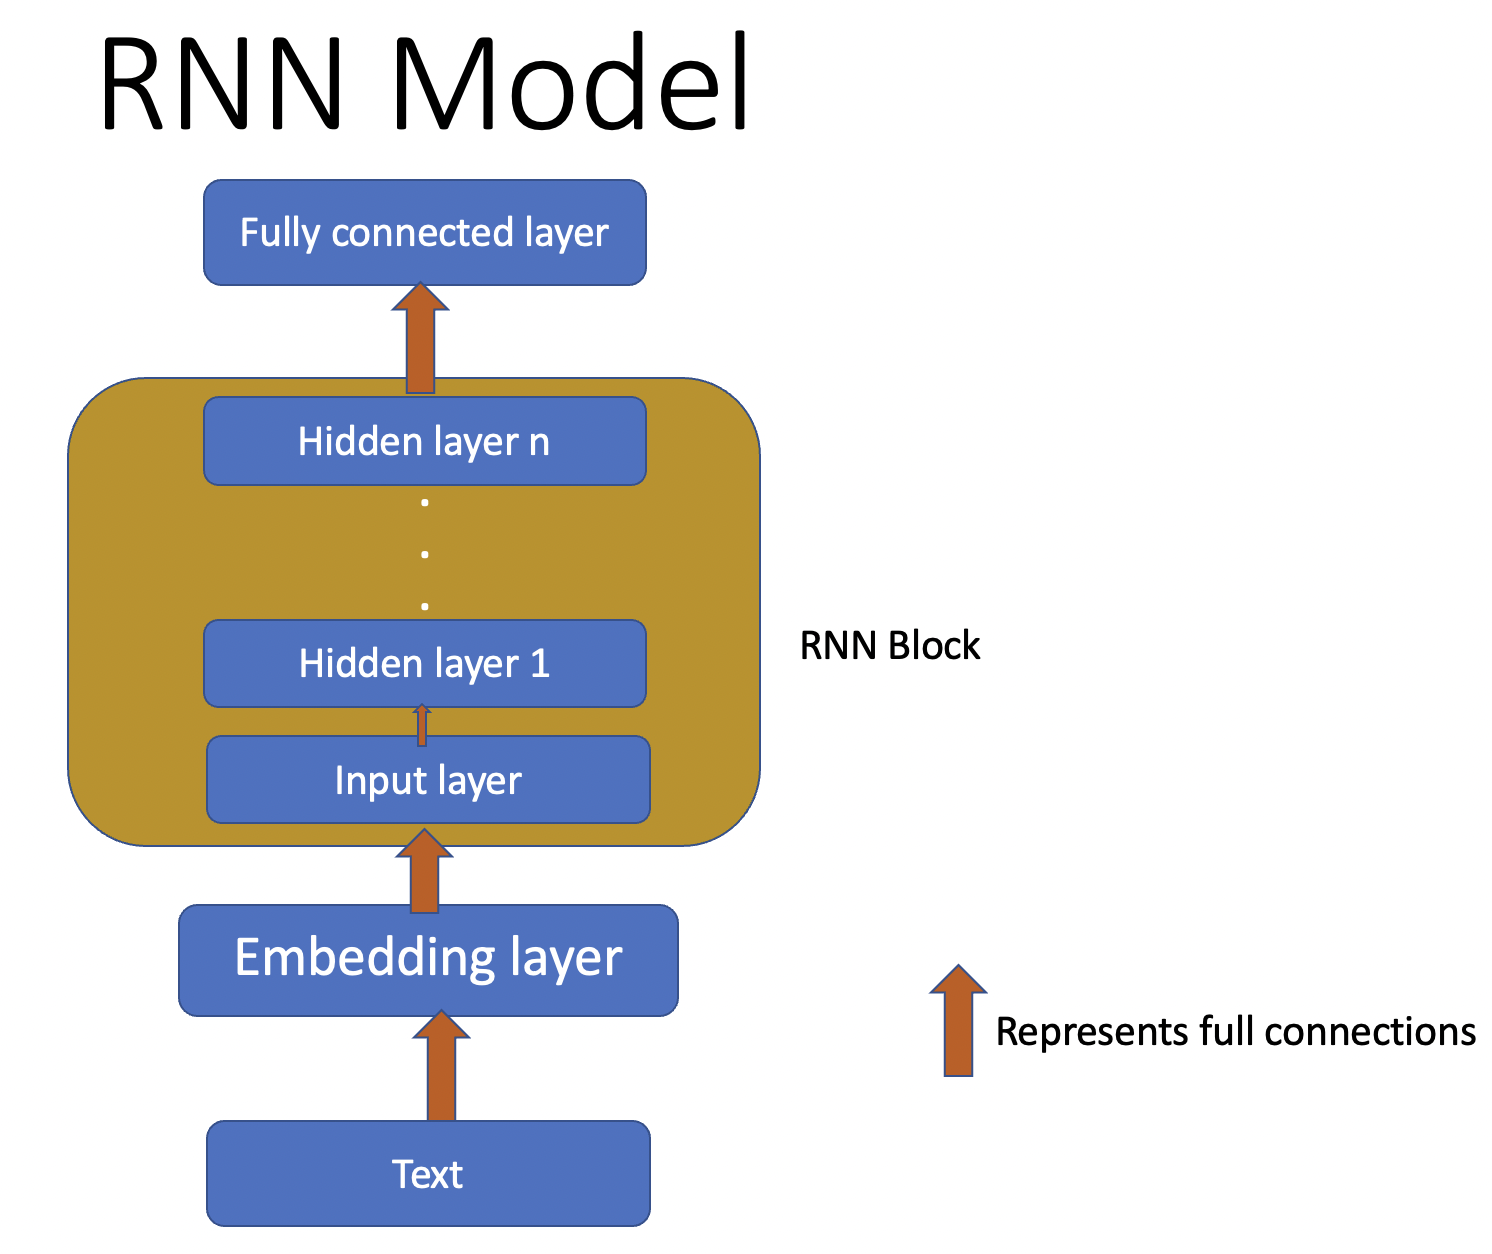

In [ ]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers,
                 bidirectional, dropout, pad_idx):

        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)

        self.rnn = nn.RNN(embedding_dim, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, dropout=dropout)

        self.fc = nn.Linear(hidden_dim * n_layers, output_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, text, text_lengths):

        #text = [sent len, batch size]

        embedded = self.dropout(self.embedding(text))

        #embedded = [sent len, batch size, emb dim]

        #pack sequence
        # lengths need to be on CPU!
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.to('cpu'))

        # packed_output, (hidden, cell) = self.rnn(packed_embedded)
        packed_output, hidden = self.rnn(packed_embedded)

        #unpack sequence
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)

        #output = [sent len, batch size, hid dim * num directions]
        #output over padding tokens are zero tensors

        #hidden = [num layers * num directions, batch size, hid dim]
        #cell = [num layers * num directions, batch size, hid dim]

        #hidden = [batch size, hid dim * num directions]

        return self.fc(hidden.squeeze(0))


#Initialising the model
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 1
N_LAYERS = 1
BIDIRECTIONAL = False
DROPOUT = 0.0
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = RNN(INPUT_DIM, EMBEDDING_DIM,  HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX)
print("The overall model is - \n")
print(model)
dash = "________________________________________________________________________\n\n"
print(dash)


criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3,momentum=0.5, weight_decay=0.0001)

model = model.to(device)
criterion = criterion.to(device)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

# if (torch.cuda.is_available()):
#     model.cuda()


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The overall model is - 

RNN(
  (embedding): Embedding(25002, 100, padding_idx=1)
  (rnn): RNN(100, 256)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
)
________________________________________________________________________


Model's state_dict:
embedding.weight 	 torch.Size([25002, 100])
rnn.weight_ih_l0 	 torch.Size([256, 100])
rnn.weight_hh_l0 	 torch.Size([256, 256])
rnn.bias_ih_l0 	 torch.Size([256])
rnn.bias_hh_l0 	 torch.Size([256])
fc.weight 	 torch.Size([1, 256])
fc.bias 	 torch.Size([1])
Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.001, 'momentum': 0.5, 'dampening': 0, 'weight_decay': 0.0001, 'nesterov': False, 'params': [0, 1, 2, 3, 4, 5, 6]}]
The model has 2,592,105 trainable parameters


In [ ]:
pretrained_embeddings = TEXT.vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([25002, 100])


In [ ]:
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[-0.1117, -0.4966,  0.1631,  ...,  1.2647, -0.2753, -0.1325],
        [-0.8555, -0.7208,  1.3755,  ...,  0.0825, -1.1314,  0.3997],
        [-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        ...,
        [ 0.5416,  0.0967,  0.6007,  ...,  0.3401,  1.0871,  0.0735],
        [-0.3122, -0.2334,  0.6604,  ..., -0.2539,  1.0355,  0.8834],
        [-0.3860, -0.5955,  0.0085,  ...,  0.0501,  0.4771, -0.0711]],
       device='cuda:0')

In [ ]:
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

In [ ]:
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

print(model.embedding.weight.data)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        ...,
        [ 0.5416,  0.0967,  0.6007,  ...,  0.3401,  1.0871,  0.0735],
        [-0.3122, -0.2334,  0.6604,  ..., -0.2539,  1.0355,  0.8834],
        [-0.3860, -0.5955,  0.0085,  ...,  0.0501,  0.4771, -0.0711]],
       device='cuda:0')


In [ ]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division
    acc = correct.sum() / len(correct)
    return acc



def train(model, iterator, optimizer, criterion):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for batch in iterator:

        optimizer.zero_grad()

        text, text_lengths = batch.text
        #print the text and text_lengths just for one example

        predictions = model(text, text_lengths).squeeze(1)

        loss = criterion(predictions, batch.label)

        acc = binary_accuracy(predictions, batch.label)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for batch in iterator:

            text, text_lengths = batch.text

            predictions = model(text, text_lengths).squeeze(1)

            loss = criterion(predictions, batch.label)

            acc = binary_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)


def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
N_EPOCHS = 20

best_valid_loss = float('inf')
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc*100)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc*100)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut1-model.pt')

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 7s
	Train Loss: 0.693 | Train Acc: 52.08%
	 Val. Loss: 0.692 |  Val. Acc: 50.68%
Epoch: 02 | Epoch Time: 0m 7s
	Train Loss: 0.691 | Train Acc: 51.76%
	 Val. Loss: 0.691 |  Val. Acc: 51.24%
Epoch: 03 | Epoch Time: 0m 7s
	Train Loss: 0.690 | Train Acc: 52.27%
	 Val. Loss: 0.690 |  Val. Acc: 51.97%
Epoch: 04 | Epoch Time: 0m 7s
	Train Loss: 0.689 | Train Acc: 52.53%
	 Val. Loss: 0.689 |  Val. Acc: 52.57%
Epoch: 05 | Epoch Time: 0m 7s
	Train Loss: 0.688 | Train Acc: 53.41%
	 Val. Loss: 0.688 |  Val. Acc: 53.94%
Epoch: 06 | Epoch Time: 0m 7s
	Train Loss: 0.687 | Train Acc: 53.77%
	 Val. Loss: 0.687 |  Val. Acc: 53.59%
Epoch: 07 | Epoch Time: 0m 7s
	Train Loss: 0.687 | Train Acc: 54.29%
	 Val. Loss: 0.687 |  Val. Acc: 53.36%
Epoch: 08 | Epoch Time: 0m 7s
	Train Loss: 0.686 | Train Acc: 54.64%
	 Val. Loss: 0.686 |  Val. Acc: 53.94%
Epoch: 09 | Epoch Time: 0m 7s
	Train Loss: 0.685 | Train Acc: 55.20%
	 Val. Loss: 0.685 |  Val. Acc: 54.33%
Epoch: 10 | Epoch Time: 0m 7

In [ ]:
import pandas as pd
pd = TabularFormat(N_EPOCHS,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)
pd

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.692690,52.082247,0.691927,50.675318
1,2,0.691277,51.755572,0.690877,51.244703
2,3,0.690251,52.267173,0.690108,51.972987
3,4,0.689247,52.528676,0.689280,52.568856
4,5,0.688358,53.413386,0.688143,53.937147
5,6,0.687463,53.771833,0.687441,53.588453
6,7,0.686584,54.294838,0.686951,53.363347
7,8,0.685729,54.640250,0.686102,53.937147
8,9,0.684866,55.195842,0.685456,54.334393
9,10,0.684022,55.297673,0.684124,55.530544


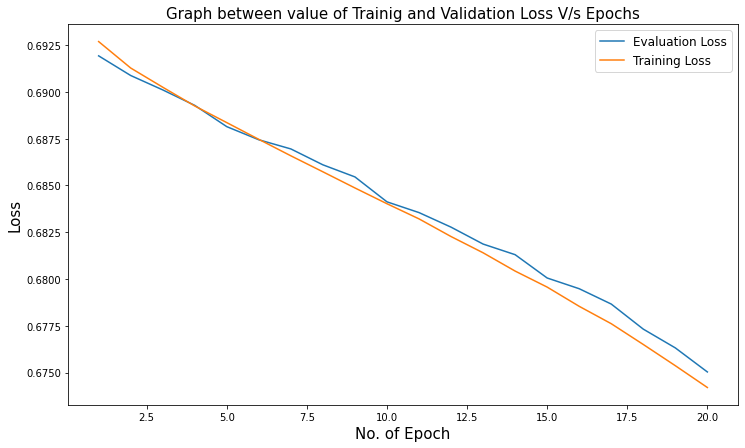



__________________________________________________




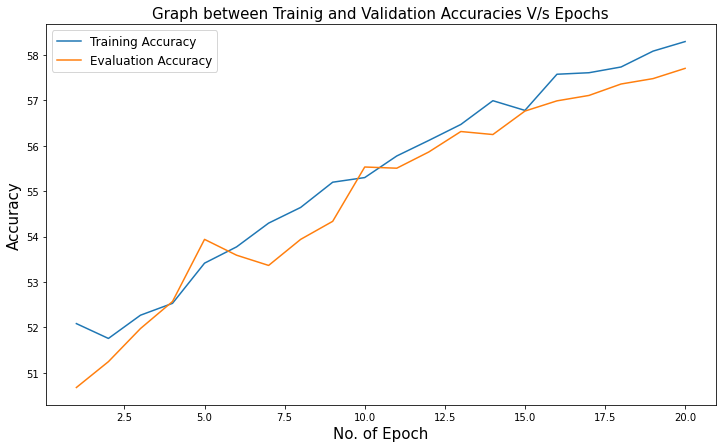

In [ ]:
GraphicalFormat(N_EPOCHS,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

# **Observation-**

As we can see, the model is still learning as loss in decreasing and the model has not converged yet. We can increase the epochs and see at what number of iterations we get a decent accuracy on validation dataset.

# **Scribing Exercise 1:**

For each of the experiment listed below, submit the graphs between training accuracy, validation accuracy vs epochs and training loss, validation loss vs epochs for each hyper-parameter as **scribes**-

# **1.**
Run the above RNN model with the given set of learning rate values for atleast 100 epochs for each learning rate and submit the graphs as instructed above-

Also, write the best learning rate value for this model from the given set of values.

Learning rate values-

    1. 0.00001
    2. 0.0001
    3. 0.001
    4. 0.01
    5. 0.1

Comment on your observations.

# **2.**
With the best learning rate value you got, utilize **learning rate scheduler** from the given LR schedulers for 100 epochs and give graphs for each as instructed-

LR Schedulers-

    1. MultiStep LR
    2. Cyclic LR
    3. Exponential LR

Comment on your observations.

# **3.**

With the best hyper-parameter values you got upto this point, increase the number of layers in RNN to $[2,3,4]$. For each of the given values, set Bi-directional as FALSE for one time and TRUE for another (two subproblems for each value). Also implement **early stopping** condition with patience value of **3** for each and submit the graphs as scribes.

Comment on your observations.



###1. Varying the LR

####1.1. LR = 0.00001

In [ ]:
model = RNN(INPUT_DIM, EMBEDDING_DIM,  HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX)
model = model.to(device)
model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

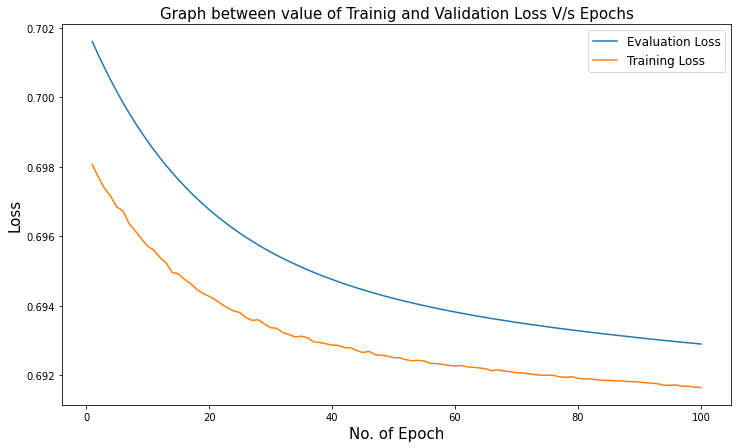



__________________________________________________




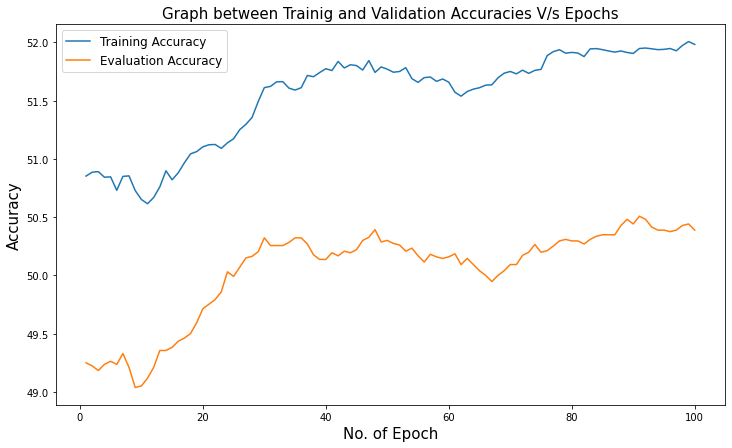

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5,momentum=0.5, weight_decay=0.0001)
N_EPOCHS = 100

best_valid_loss = float('inf')
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc*100)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc*100)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut1.1-model.pt')

GraphicalFormat(N_EPOCHS,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

Losses smoothly decrease and accuracies smoothly increase with epochs

In [ ]:
pd11 = TabularFormat(N_EPOCHS,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)
pd11

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.698066,50.852125,0.701606,49.249647
1,2,0.697702,50.885525,0.701215,49.223164
2,3,0.697378,50.890413,0.700847,49.183439
3,4,0.697148,50.842349,0.700497,49.236405
4,5,0.696842,50.845607,0.700163,49.262888
...,...,...,...,...,...
95,96,0.691716,51.947015,0.692966,50.375177
96,97,0.691680,51.927464,0.692948,50.388418
97,98,0.691682,51.973084,0.692931,50.428143
98,99,0.691653,52.006485,0.692914,50.441384


####1.2. LR = 0.0001

In [ ]:
model = RNN(INPUT_DIM, EMBEDDING_DIM,  HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX)
model = model.to(device)
model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

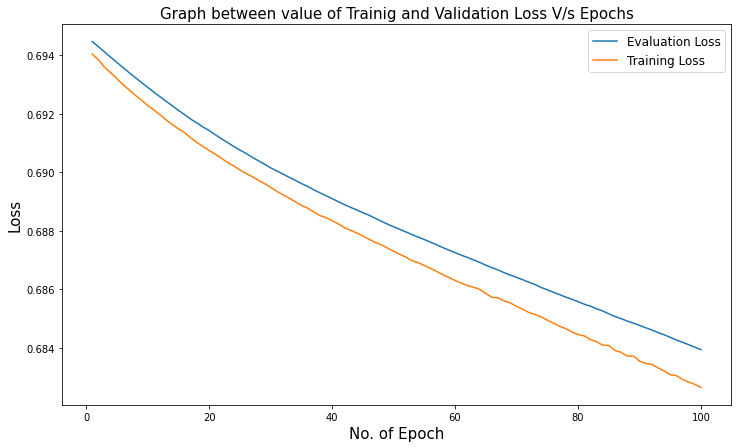



__________________________________________________




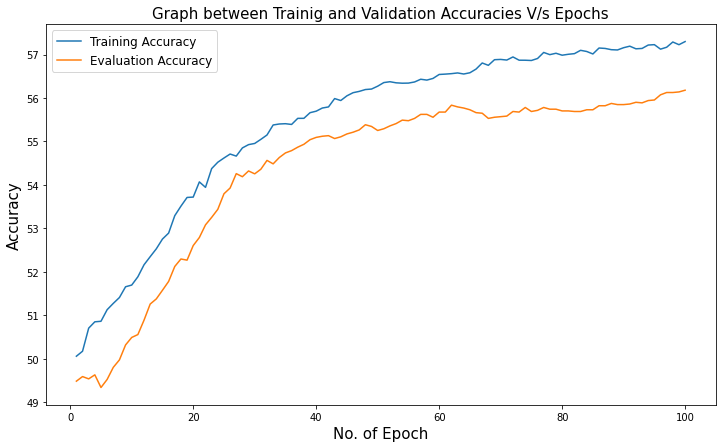

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4,momentum=0.5, weight_decay=0.0001)
N_EPOCHS = 100

best_valid_loss = float('inf')
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc*100)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc*100)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut1.2-model.pt')

GraphicalFormat(N_EPOCHS,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

Losses smoothly decrease and accuracies smoothly increase with epochs, the gap between train and val curves is lesser than earlier.

In [ ]:
pd12 = TabularFormat(N_EPOCHS,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)
pd12

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.694037,50.057840,0.694468,49.483581
1,2,0.693848,50.172706,0.694293,49.589513
2,3,0.693589,50.703858,0.694111,49.536547
3,4,0.693400,50.849681,0.693932,49.629237
4,5,0.693203,50.861900,0.693756,49.337924
...,...,...,...,...,...
95,96,0.683048,57.124120,0.684265,56.073446
96,97,0.682915,57.168111,0.684186,56.126412
97,98,0.682825,57.288680,0.684106,56.126412
98,99,0.682750,57.226766,0.684020,56.139654


####1.3. LR = 0.001

In [ ]:
model = RNN(INPUT_DIM, EMBEDDING_DIM,  HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX)
model = model.to(device)
model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

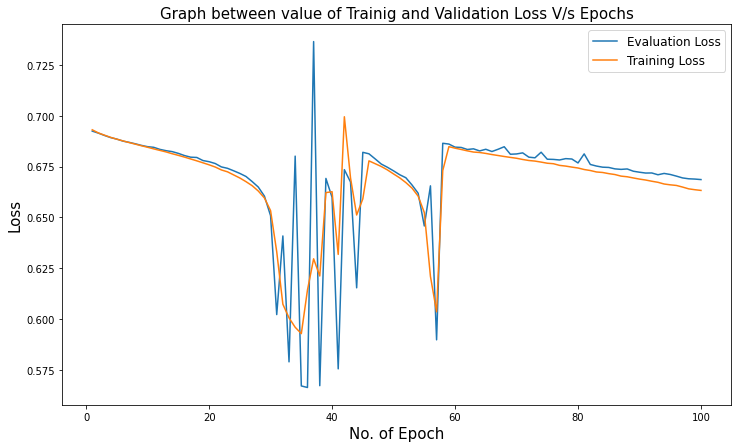



__________________________________________________




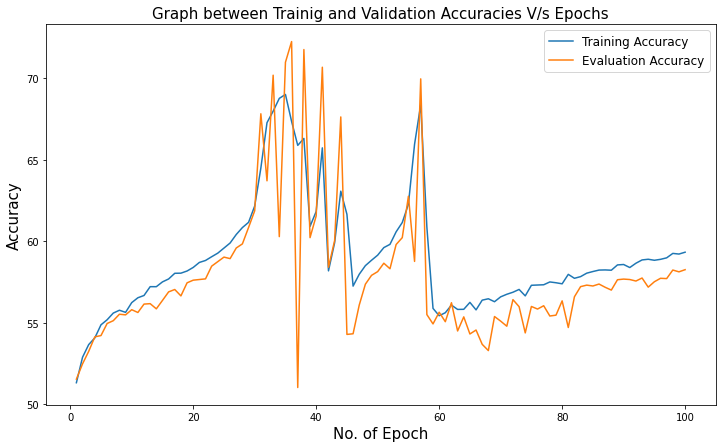

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3,momentum=0.5, weight_decay=0.0001)
N_EPOCHS = 100

best_valid_loss = float('inf')
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc*100)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc*100)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut1.3-model.pt')

GraphicalFormat(N_EPOCHS,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

There are fluctuations observed in the middle iterations but on a net basis the losses decrease and accuracies increase with epochs (smoothly for later iterations) and there is very less gap between train and val curves.

In [ ]:
pd13 = TabularFormat(N_EPOCHS,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)
pd13

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.693071,51.309144,0.692428,51.527189
1,2,0.691521,52.872458,0.691433,52.467338
2,3,0.690403,53.650450,0.690282,53.235346
3,4,0.689338,54.062663,0.689231,54.126942
4,5,0.688446,54.866723,0.688491,54.206391
...,...,...,...,...,...
95,96,0.665703,58.889468,0.670291,57.724223
96,97,0.664911,58.981524,0.669407,57.706568
97,98,0.664032,59.253617,0.668981,58.231815
98,99,0.663606,59.213699,0.668838,58.121469


####1.4. LR = 0.01

In [ ]:
model = RNN(INPUT_DIM, EMBEDDING_DIM,  HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX)
model = model.to(device)
model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

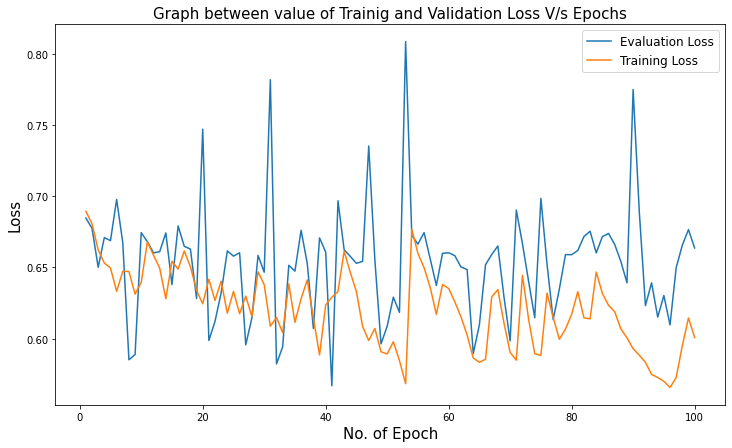



__________________________________________________




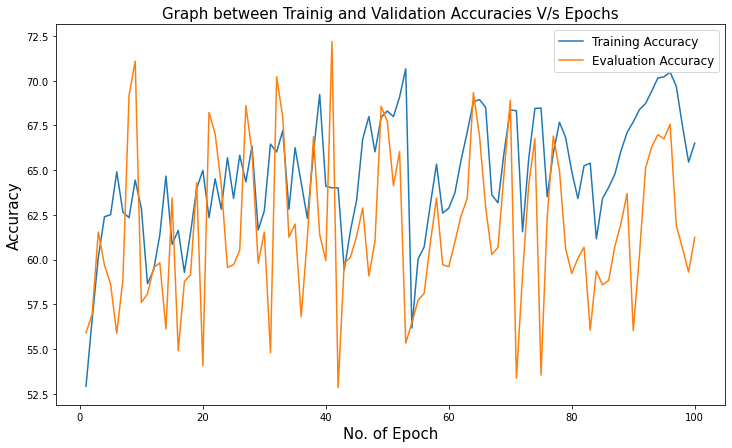

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2,momentum=0.5, weight_decay=0.0001)
N_EPOCHS = 100

best_valid_loss = float('inf')
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc*100)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc*100)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut1.4-model.pt')

GraphicalFormat(N_EPOCHS,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

There are a lot of fluctuations throughout although on net basis the losses decrease and accuracies increase with epochs

In [ ]:
pd14 = TabularFormat(N_EPOCHS,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)
pd14

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.689460,52.913191,0.684777,55.905720
1,2,0.680617,56.659769,0.677426,56.942973
2,3,0.662285,60.120405,0.650122,61.542196
3,4,0.653095,62.392466,0.671045,59.692797
4,5,0.649595,62.512220,0.668831,58.615819
...,...,...,...,...,...
95,96,0.565626,70.481133,0.609616,67.567090
96,97,0.572600,69.694995,0.649788,61.895304
97,98,0.594959,67.493809,0.665666,60.641773
98,99,0.614505,65.449035,0.676593,59.295551


####1.5. LR = 0.1

In [ ]:
model = RNN(INPUT_DIM, EMBEDDING_DIM,  HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX)
model = model.to(device)
model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

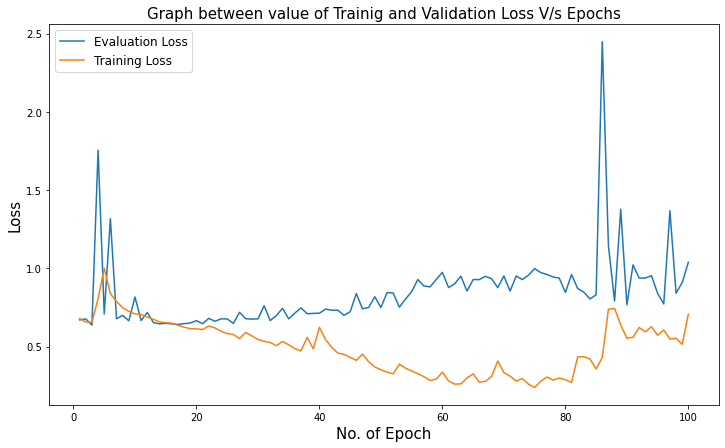



__________________________________________________




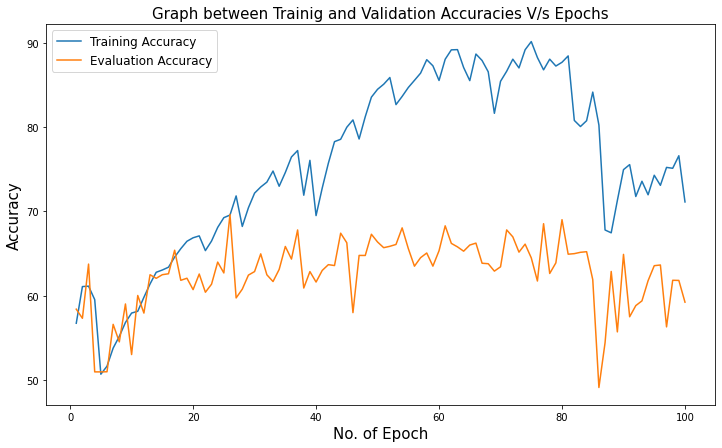

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1,momentum=0.5, weight_decay=0.0001)
N_EPOCHS = 100

best_valid_loss = float('inf')
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc*100)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc*100)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut1.5-model.pt')

GraphicalFormat(N_EPOCHS,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

Here, evaluation loss has infact increased on net basis with epochs. Accuracies do increase with epoch (train acc reaching ~90%) but towards the end decrease with epochs.

In [ ]:
pd15 = TabularFormat(N_EPOCHS,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)
pd15

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.679063,56.726571,0.669924,58.395127
1,2,0.657100,61.076805,0.676298,57.313736
2,3,0.655746,61.125684,0.637113,63.744703
3,4,0.805970,59.533042,1.754155,50.953390
4,5,0.999186,50.678604,0.707863,50.953390
...,...,...,...,...,...
95,96,0.605296,73.091273,0.772331,63.638771
96,97,0.547544,75.219956,1.367845,56.294138
97,98,0.553194,75.114051,0.840387,61.824682
98,99,0.514443,76.602418,0.909052,61.807027


####Observations

For LR=1e-5 & 1e-4, the loss decreases & accuracy increases (slowly & smoothly) with epochs, whereas for others there are fluctuations. Except for LR=0.1, the accuracies and losses (train and val) on net effect increase and decrease respectively with epochs. In general the final accuracies increase & final losses decrease with increasing learning rate. For LR=0.1, the validation accuracy decreased towards the end epochs perhaps due to big LR the params overshoot the minima of objective. The combination of desired learning behaviour (fast & smooth increase in acc and decrease in loss with good alignment between train & val) along with higher val acc seems to be best for LR=0.001.

###2. Varying the LRS

####Exponential Decay

In [ ]:
model = RNN(INPUT_DIM, EMBEDDING_DIM,  HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX)
model = model.to(device)
model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [ ]:
#Vary learning rate from 0.004 to 0.0005 (i.e. around 0.001) using 0.98 exp decay factor
optimizer = torch.optim.SGD(model.parameters(), lr=0.004, momentum=0.5, weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, 0.98)

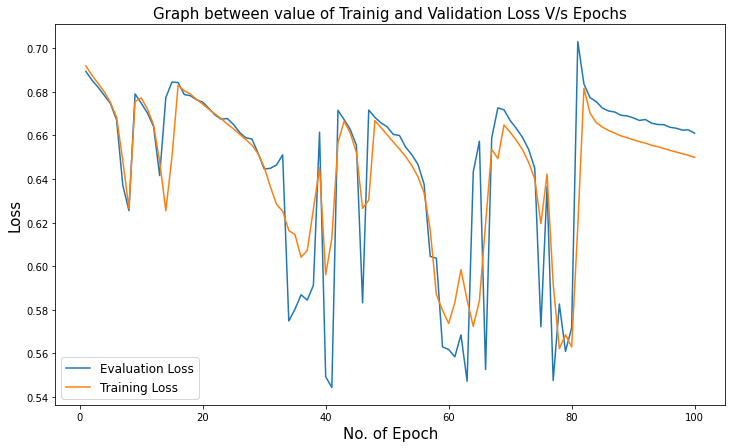



__________________________________________________




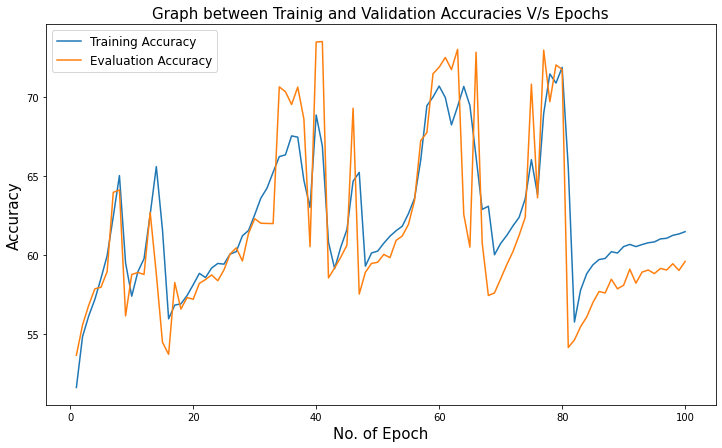

In [ ]:
N_EPOCHS = 100

best_valid_loss = float('inf')
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    scheduler.step()
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc*100)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc*100)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2.1-model.pt')

GraphicalFormat(N_EPOCHS,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

Close alignment bewteen curves of train & val. There are fluctuations for most epochs but towards the end (lower LR at higher epochs) smooth desired learning behaviour seems to have begun.

In [ ]:
pd21 = TabularFormat(N_EPOCHS,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)
pd21

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.691855,51.602418,0.689333,53.650247
1,2,0.687507,54.830064,0.685327,55.565855
2,3,0.683786,56.134320,0.682041,56.810558
3,4,0.679949,57.185219,0.678338,57.861052
4,5,0.675000,58.522875,0.674580,57.962571
...,...,...,...,...,...
95,96,0.653162,61.027112,0.663721,59.154308
96,97,0.652362,61.064586,0.663291,59.052790
97,98,0.651624,61.252770,0.662427,59.450035
98,99,0.650851,61.339937,0.662529,59.026307


####Cyclic LR

In [ ]:
model = RNN(INPUT_DIM, EMBEDDING_DIM,  HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX)
model = model.to(device)
model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [ ]:
#Vary learning rate cyclically between 0.004 and 0.0005 (i.e. around 0.001)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5, weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, 0.0005, 0.004)

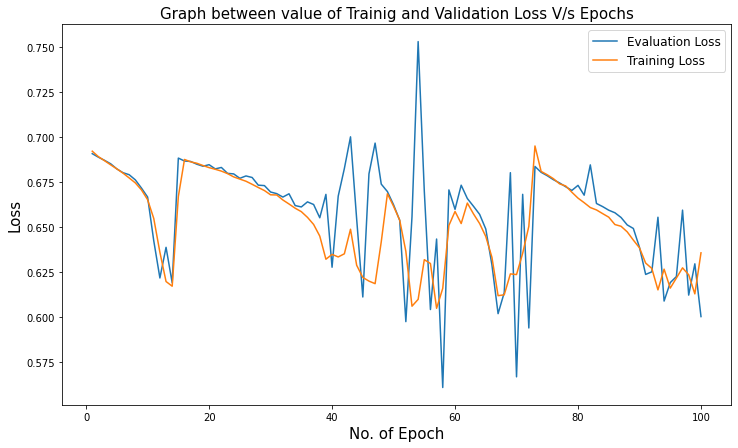



__________________________________________________




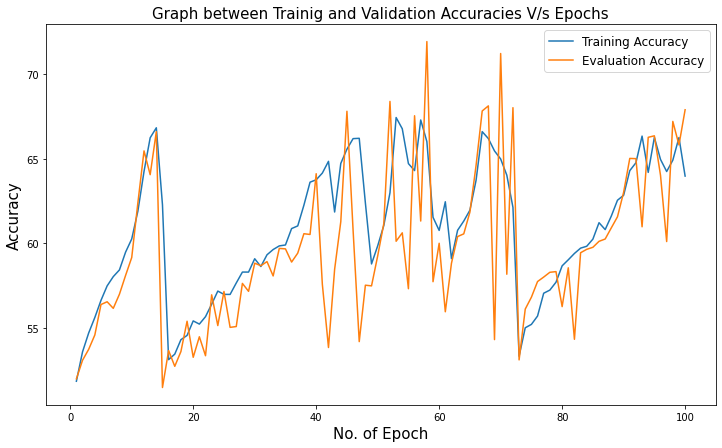

In [ ]:
N_EPOCHS = 100

best_valid_loss = float('inf')
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc*100)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc*100)
    scheduler.step()
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2.2-model.pt')

GraphicalFormat(N_EPOCHS,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

Cycles of smoothly decreasing losses / increasing accuracies and fluctuations are visible in the curves along with alignment between train & val curves in smooth regions. On net, losses have decreased and accuracies have increased with epochs.

In [ ]:
pd22 = TabularFormat(N_EPOCHS,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)
pd22

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.692228,51.849257,0.690856,51.990643
1,2,0.689174,53.587722,0.688885,53.089689
2,3,0.686927,54.705422,0.687128,53.738524
3,4,0.684603,55.621090,0.685194,54.585982
4,5,0.682382,56.632886,0.682349,56.386829
...,...,...,...,...,...
95,96,0.621583,64.969206,0.622412,64.027189
96,97,0.627261,64.255572,0.659407,60.112112
97,98,0.623385,64.925215,0.612078,67.218397
98,99,0.612767,66.263686,0.629505,65.828037


####MultiStep LR

In [ ]:
model = RNN(INPUT_DIM, EMBEDDING_DIM,  HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX)
model = model.to(device)
model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [ ]:
#Vary learning rate from 0.004 to 0.0005 by reducing it by 0.5 factor every 25 epochs
optimizer = torch.optim.SGD(model.parameters(), lr=0.004, momentum=0.5, weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[25,50,75], gamma=0.5)

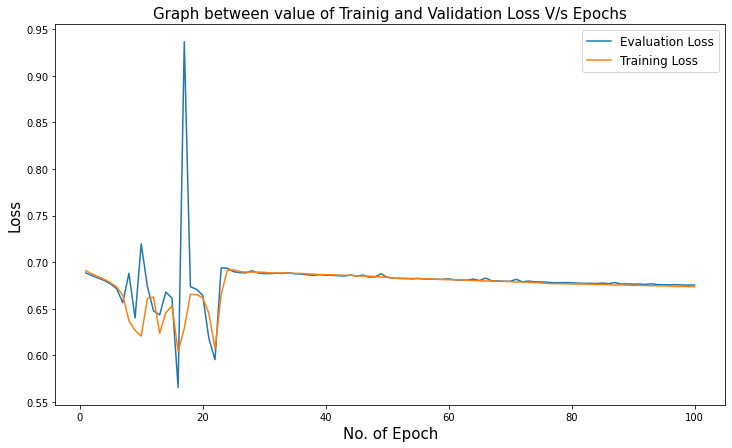



__________________________________________________




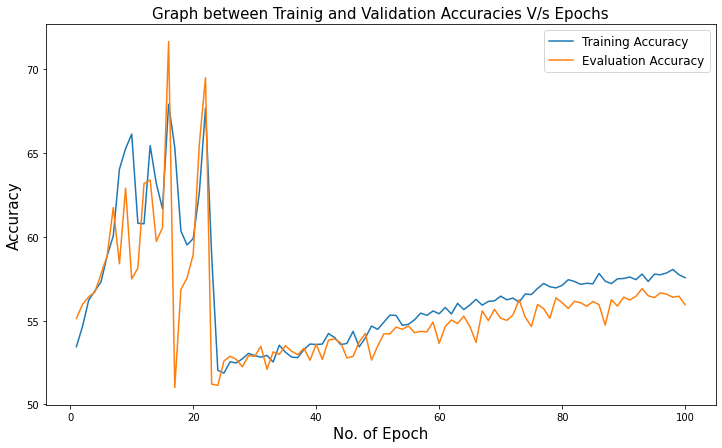

In [ ]:
N_EPOCHS = 100

best_valid_loss = float('inf')
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc*100)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc*100)
    scheduler.step()
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2.3-model.pt')

GraphicalFormat(N_EPOCHS,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

The curves clearly have fluctuations till 25 epochs and a smooth learning behaviour is observed later indicating learning rate below 0.002 is better. Big spikes (upward in loss and downward in accuracy) were observed prior to this.

In [ ]:
pd23 = TabularFormat(N_EPOCHS,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)
pd23

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.690856,53.450046,0.688463,55.137712
1,2,0.687365,54.657358,0.685607,55.976342
2,3,0.684498,56.226375,0.682902,56.422140
3,4,0.681483,56.775450,0.680389,56.704626
4,5,0.678051,57.311490,0.676615,57.777189
...,...,...,...,...,...
95,96,0.674263,57.740811,0.675729,56.664901
96,97,0.674020,57.849159,0.675917,56.576624
97,98,0.674025,58.058525,0.675537,56.400071
98,99,0.673799,57.742440,0.675339,56.457451


####Observations

Final validation accuracy was highest (67%) for cyclic learning rate. Based on conclusions from experiments uptill now, I will limit the max LR value in Cyclic scheduler to 0.002.

###Varying the no of layers & bidirectionality with early stopping

####2 Layer RNN

In [ ]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers,
                 bidirectional, dropout, pad_idx):

        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)

        self.rnn = nn.RNN(embedding_dim, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, dropout=dropout)

        self.fc = nn.Linear(hidden_dim * n_layers, output_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, text, text_lengths):

        #text = [sent len, batch size]

        embedded = self.dropout(self.embedding(text))

        #embedded = [sent len, batch size, emb dim]

        #pack sequence
        # lengths need to be on CPU!
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.to('cpu'))

        # packed_output, (hidden, cell) = self.rnn(packed_embedded)
        packed_output, hidden = self.rnn(packed_embedded)

        #unpack sequence
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)

        #output = [sent len, batch size, hid dim * num directions]
        #output over padding tokens are zero tensors

        #hidden = [num layers * num directions, batch size, hid dim]
        #cell = [num layers * num directions, batch size, hid dim]

        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
        #hidden = [batch size, hid dim * num directions]

        return self.fc(hidden)

In [ ]:
model = RNN(INPUT_DIM, EMBEDDING_DIM,  HIDDEN_DIM, OUTPUT_DIM, 2, False, DROPOUT, PAD_IDX)
model = model.to(device)
model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)
#Vary learning rate cyclically between 0.002 and 0.0005 (i.e. around 0.001)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5, weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, 0.0005, 0.002)

In [ ]:
N_EPOCHS = 100
es_patience = 3
patience = 0

best_valid_loss = float('inf')
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc*100)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc*100)
    scheduler.step()
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        patience = 0
    else:
        patience += 1
        if patience == es_patience:
            print(f'Early stopping!')
            break

Early stopping!


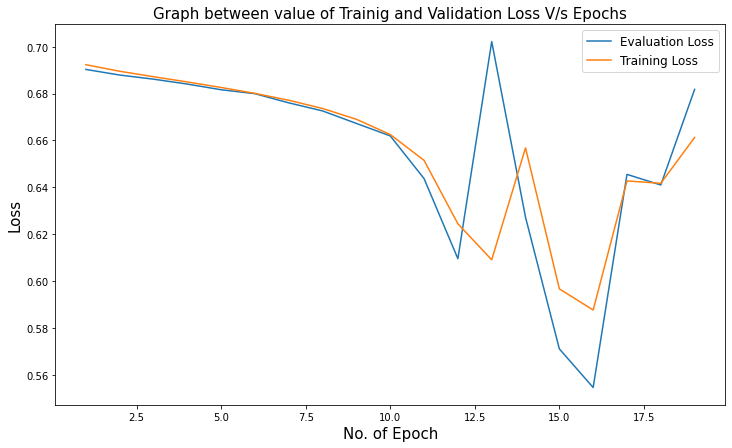



__________________________________________________




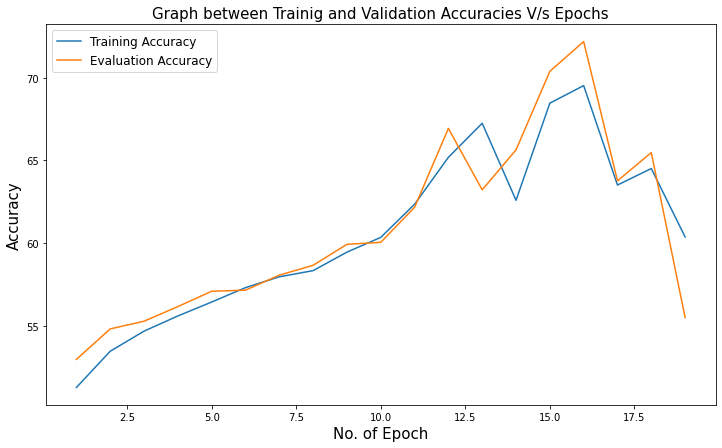

In [ ]:
GraphicalFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

In [ ]:
TabularFormat(epoch,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.692301,51.259450,0.690283,52.961688
1,2,0.689504,53.454934,0.687889,54.806674
2,3,0.687170,54.670392,0.686130,55.270127
3,4,0.684943,55.589318,0.684042,56.157309
4,5,0.682586,56.432482,0.681620,57.084216
5,6,0.680071,57.302529,0.679935,57.150424
6,7,0.677133,57.959137,0.676030,58.059675
7,8,0.673629,58.333876,0.672583,58.655544
8,9,0.669017,59.453206,0.667251,59.926730
9,10,0.662523,60.345249,0.661940,60.045904


The model learnt well to reach 72% validation accuracy by 16 epochs

####2 Layer Bidirectional RNN

In [ ]:
model = RNN(INPUT_DIM, EMBEDDING_DIM,  HIDDEN_DIM, OUTPUT_DIM, 2, True, DROPOUT, PAD_IDX)
model = model.to(device)
model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)
#Vary learning rate cyclically between 0.002 and 0.0005 (i.e. around 0.001)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5, weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, 0.0005, 0.002)

In [ ]:
N_EPOCHS = 100
es_patience = 3
patience = 0

best_valid_loss = float('inf')
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc*100)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc*100)
    scheduler.step()
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        patience = 0
        torch.save(model.state_dict(), 'tut3.1-model.pt')
    else:
        patience += 1
        if patience == es_patience:
            print(f'Early stopping!')
            break

Early stopping!


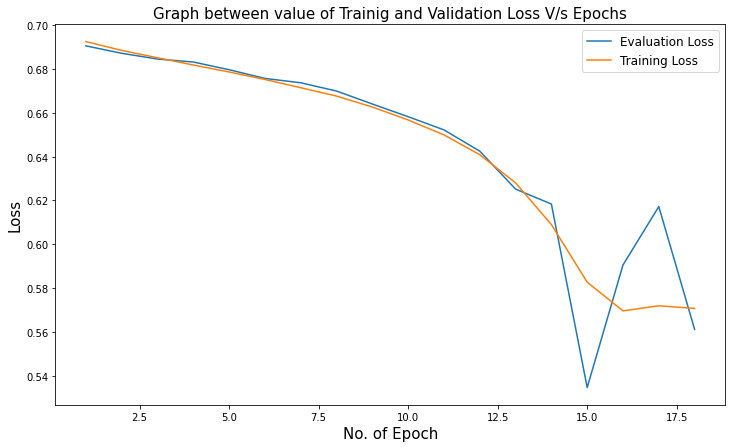



__________________________________________________




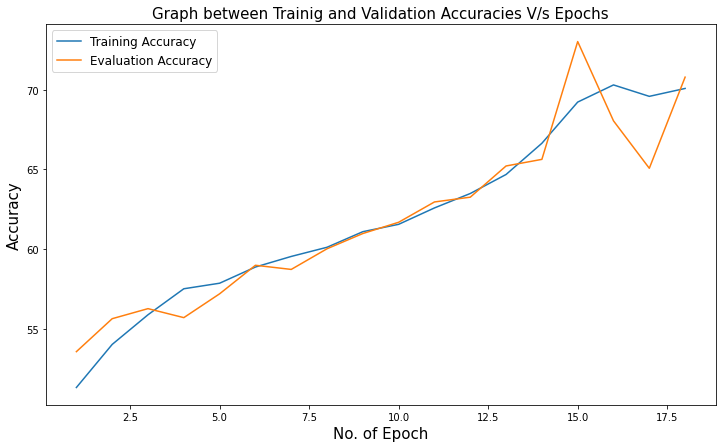

In [ ]:
GraphicalFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

In [ ]:
TabularFormat(epoch,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.692581,51.305885,0.690619,53.557557
1,2,0.688543,54.012155,0.687231,55.627648
2,3,0.685198,55.874446,0.684604,56.258828
3,4,0.681880,57.507006,0.683244,55.693856
4,5,0.678694,57.855676,0.679730,57.190148
5,6,0.675276,58.872361,0.675747,58.982168
6,7,0.671513,59.537115,0.673766,58.721751
7,8,0.667686,60.113074,0.669990,60.019421
8,9,0.662682,61.092284,0.664060,60.977225
9,10,0.656795,61.554191,0.658260,61.683439


The model learnt well to reach 73% validation accuracy by 15 epochs

####3 Layer RNN

In [ ]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers,
                 bidirectional, dropout, pad_idx):

        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)

        self.rnn = nn.RNN(embedding_dim, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, dropout=dropout)

        self.fc = nn.Linear(hidden_dim * n_layers, output_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, text, text_lengths):

        #text = [sent len, batch size]

        embedded = self.dropout(self.embedding(text))

        #embedded = [sent len, batch size, emb dim]

        #pack sequence
        # lengths need to be on CPU!
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.to('cpu'))

        # packed_output, (hidden, cell) = self.rnn(packed_embedded)
        packed_output, hidden = self.rnn(packed_embedded)

        #unpack sequence
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)

        #output = [sent len, batch size, hid dim * num directions]
        #output over padding tokens are zero tensors

        #hidden = [num layers * num directions, batch size, hid dim]
        #cell = [num layers * num directions, batch size, hid dim]

        hidden = self.dropout(torch.cat((hidden[-3,:,:], hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
        #hidden = [batch size, hid dim * num directions]

        return self.fc(hidden)

In [ ]:
model = RNN(INPUT_DIM, EMBEDDING_DIM,  HIDDEN_DIM, OUTPUT_DIM, 3, False, DROPOUT, PAD_IDX)
model = model.to(device)
model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)
#Vary learning rate cyclically between 0.002 and 0.0005 (i.e. around 0.001)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5, weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, 0.0005, 0.002)

In [ ]:
N_EPOCHS = 100
es_patience = 3
patience = 0

best_valid_loss = float('inf')
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc*100)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc*100)
    scheduler.step()
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        patience = 0
        torch.save(model.state_dict(), 'tut3.1-model.pt')
    else:
        patience += 1
        if patience == es_patience:
            print(f'Early stopping!')
            break

Early stopping!


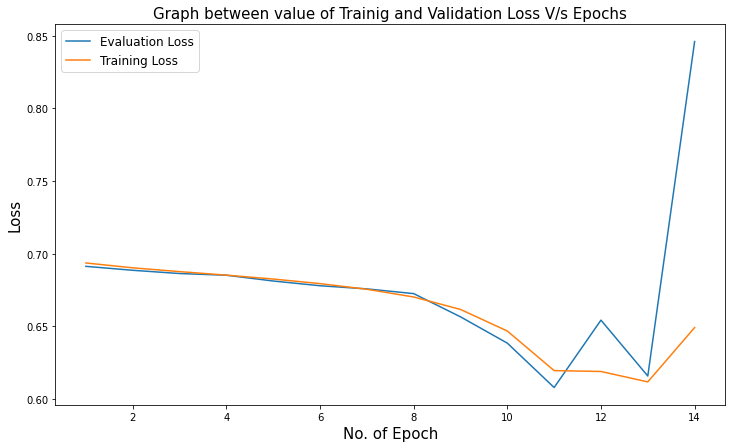



__________________________________________________




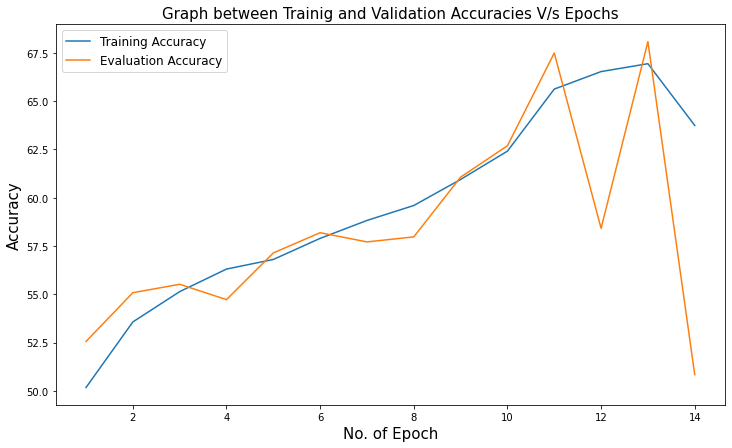

In [ ]:
GraphicalFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

In [ ]:
TabularFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.693561,50.172706,0.691238,52.555614
1,2,0.690224,53.566541,0.688526,55.080332
2,3,0.687604,55.136373,0.686298,55.517302
3,4,0.685193,56.304582,0.685114,54.722811
4,5,0.682498,56.801519,0.681144,57.141596
5,6,0.679350,57.894780,0.677885,58.187677
6,7,0.675456,58.821852,0.675724,57.710982
7,8,0.670150,59.596585,0.672465,57.971398
8,9,0.661573,60.944832,0.656483,61.065501
9,10,0.646711,62.411203,0.638376,62.689795


The model learnt well to reach 68% validation accuracy by 13 epochs

####3 Layer Bidirectional RNN

In [ ]:
model = RNN(INPUT_DIM, EMBEDDING_DIM,  HIDDEN_DIM, OUTPUT_DIM, 3, True, DROPOUT, PAD_IDX)
model = model.to(device)
model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)
#Vary learning rate cyclically between 0.002 and 0.0005 (i.e. around 0.001)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5, weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, 0.0005, 0.002)

In [ ]:
N_EPOCHS = 100
es_patience = 3
patience = 0

best_valid_loss = float('inf')
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc*100)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc*100)
    scheduler.step()
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        patience = 0
    else:
        patience += 1
        if patience == es_patience:
            print(f'Early stopping!')
            break

Early stopping!


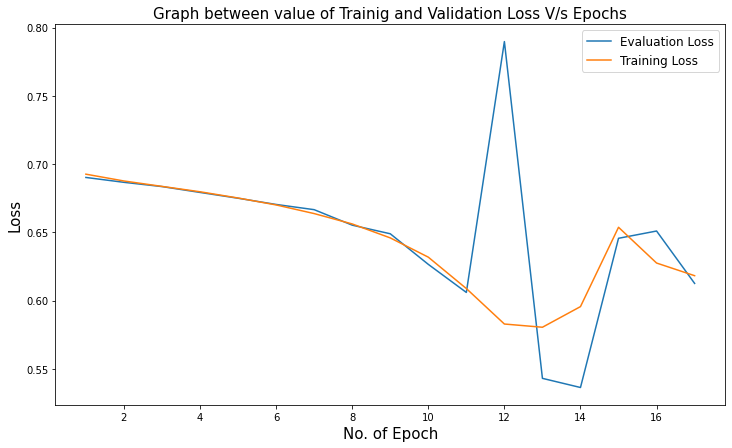



__________________________________________________




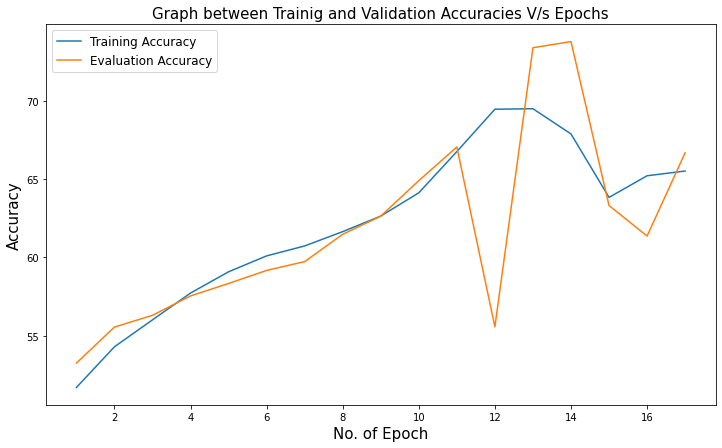

In [ ]:
GraphicalFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

In [ ]:
TabularFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.692583,51.706693,0.690172,53.261829
1,2,0.687585,54.302985,0.686606,55.561441
2,3,0.683624,56.021083,0.683485,56.311794
3,4,0.679684,57.731850,0.679197,57.547669
4,5,0.675109,59.087428,0.674945,58.342161
5,6,0.670038,60.102483,0.670391,59.176377
6,7,0.663704,60.736281,0.666566,59.736935
7,8,0.656104,61.649505,0.655220,61.480403
8,9,0.645883,62.640935,0.648908,62.636829
9,10,0.631767,64.126043,0.626497,64.901130


The model learnt well to reach 74% validation accuracy by 14 epochs

####4 Layer RNN

In [ ]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers,
                 bidirectional, dropout, pad_idx):

        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)

        self.rnn = nn.RNN(embedding_dim, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, dropout=dropout)

        self.fc = nn.Linear(hidden_dim * n_layers, output_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, text, text_lengths):

        #text = [sent len, batch size]

        embedded = self.dropout(self.embedding(text))

        #embedded = [sent len, batch size, emb dim]

        #pack sequence
        # lengths need to be on CPU!
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.to('cpu'))

        # packed_output, (hidden, cell) = self.rnn(packed_embedded)
        packed_output, hidden = self.rnn(packed_embedded)

        #unpack sequence
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)

        #output = [sent len, batch size, hid dim * num directions]
        #output over padding tokens are zero tensors

        #hidden = [num layers * num directions, batch size, hid dim]
        #cell = [num layers * num directions, batch size, hid dim]

        hidden = self.dropout(torch.cat((hidden[-4,:,:], hidden[-3,:,:], hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
        #hidden = [batch size, hid dim * num directions]

        return self.fc(hidden)

In [ ]:
model = RNN(INPUT_DIM, EMBEDDING_DIM,  HIDDEN_DIM, OUTPUT_DIM, 4, False, DROPOUT, PAD_IDX)
model = model.to(device)
model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)
#Vary learning rate cyclically between 0.002 and 0.0005 (i.e. around 0.001)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5, weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, 0.0005, 0.002)

In [ ]:
N_EPOCHS = 100
es_patience = 3
patience = 0

best_valid_loss = float('inf')
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc*100)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc*100)
    scheduler.step()
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        patience = 0
    else:
        patience += 1
        if patience == es_patience:
            print(f'Early stopping!')
            break

Early stopping!


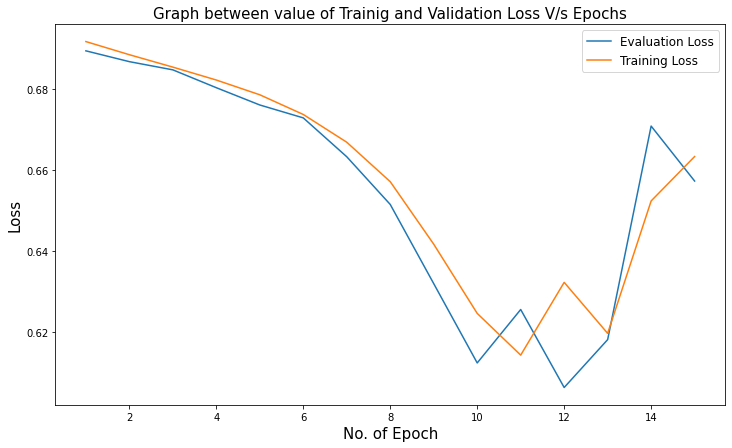



__________________________________________________




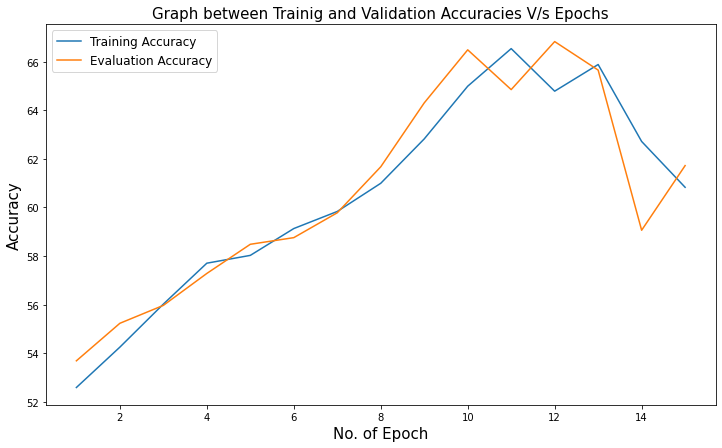

In [ ]:
GraphicalFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

In [ ]:
TabularFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.691797,52.586516,0.689509,53.685558
1,2,0.688553,54.248403,0.686838,55.230403
2,3,0.685490,56.020269,0.684812,55.967514
3,4,0.682298,57.704966,0.680402,57.282839
4,5,0.678655,58.026753,0.676135,58.483404
5,6,0.673790,59.131419,0.672947,58.757062
6,7,0.666936,59.835278,0.663345,59.781073
7,8,0.657192,60.995340,0.651565,61.674612
8,9,0.641752,62.822602,0.632009,64.305261
9,10,0.624662,64.992016,0.612425,66.490113


The model learnt well to reach 67% validation accuracy by 12 epochs

####4 Layer Bidirectional RNN

In [ ]:
model = RNN(INPUT_DIM, EMBEDDING_DIM,  HIDDEN_DIM, OUTPUT_DIM, 4, True, DROPOUT, PAD_IDX)
model = model.to(device)
model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)
#Vary learning rate cyclically between 0.002 and 0.0005 (i.e. around 0.001)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5, weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, 0.0005, 0.002)

In [ ]:
N_EPOCHS = 100
es_patience = 3
patience = 0

best_valid_loss = float('inf')
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc*100)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc*100)
    scheduler.step()
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        patience = 0
    else:
        patience += 1
        if patience == es_patience:
            print(f'Early stopping!')
            break

Early stopping!


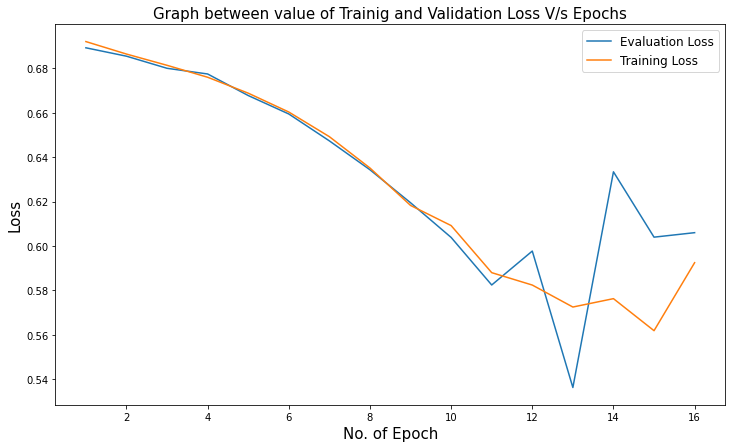



__________________________________________________




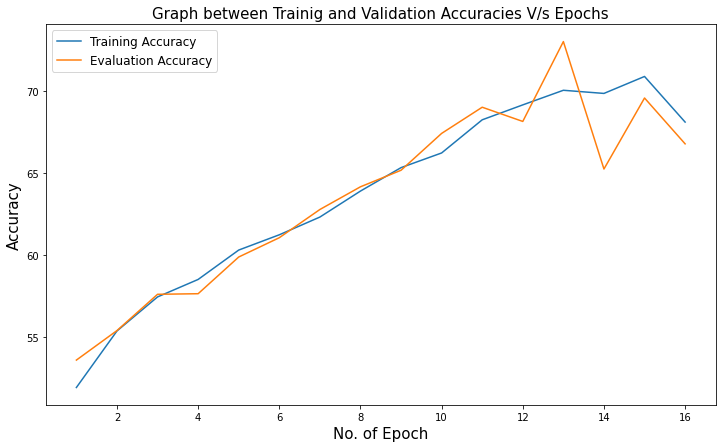

In [ ]:
GraphicalFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

In [ ]:
TabularFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.692113,51.951088,0.689306,53.619350
1,2,0.686488,55.391358,0.685528,55.415784
2,3,0.681414,57.463015,0.680069,57.622705
3,4,0.676035,58.526134,0.677508,57.658016
4,5,0.668865,60.314292,0.667795,59.891419
5,6,0.660362,61.243809,0.659483,61.065501
6,7,0.649246,62.322406,0.647355,62.782486
7,8,0.635125,63.903643,0.634338,64.164018
8,9,0.618265,65.330096,0.619472,65.170374
9,10,0.609184,66.222954,0.603841,67.412606


The model learnt well to reach 73% validation accuracy by 13 epochs

####Observations

The 3 Layer Bidirectional RNN model yielded the highest validation accuracy (approx 74%).<br>
For any no of layers, the maximum validation accuracy is higher for the bidirectional model.

# **LSTM-**

## **LSTM with constant LR-**

In [ ]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers,
                 bidirectional, dropout, pad_idx):

        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)

        self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, dropout=dropout)


        self.fc = nn.Linear(hidden_dim * n_layers, output_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, text, text_lengths):

        #text = [sent len, batch size]

        embedded = self.dropout(self.embedding(text))

        #embedded = [sent len, batch size, emb dim]

        #pack sequence
        # lengths need to be on CPU!
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.to('cpu'))

        packed_output, (hidden, cell) = self.rnn(packed_embedded)


        #unpack sequence
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)

        #output = [sent len, batch size, hid dim * num directions]
        #output over padding tokens are zero tensors

        #hidden = [num layers * num directions, batch size, hid dim]
        #cell = [num layers * num directions, batch size, hid dim]

        #concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers
        #and apply dropout

        # hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))

        #hidden = [batch size, hid dim * num directions]

        return self.fc(hidden.squeeze(0))


#Initialising the model
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 1
N_LAYERS = 1
BIDIRECTIONAL = False
DROPOUT = 0.5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = RNN(INPUT_DIM, EMBEDDING_DIM,  HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX)
print("The overall model is - \n")
print(model)
dash = "________________________________________________________________________\n\n"
print(dash)


criterion = torch.nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=0.7, weight_decay=0.0001)

model = model.to(device)
criterion = criterion.to(device)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

# if (torch.cuda.is_available()):
#     model.cuda()


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

pretrained_embeddings = TEXT.vocab.vectors

model.embedding.weight.data.copy_(pretrained_embeddings)

UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


The overall model is - 

RNN(
  (embedding): Embedding(25002, 100, padding_idx=1)
  (rnn): LSTM(100, 256, dropout=0.5)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
________________________________________________________________________


Model's state_dict:
embedding.weight 	 torch.Size([25002, 100])
rnn.weight_ih_l0 	 torch.Size([1024, 100])
rnn.weight_hh_l0 	 torch.Size([1024, 256])
rnn.bias_ih_l0 	 torch.Size([1024])
rnn.bias_hh_l0 	 torch.Size([1024])
fc.weight 	 torch.Size([1, 256])
fc.bias 	 torch.Size([1])
Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.01, 'momentum': 0.7, 'dampening': 0, 'weight_decay': 0.0001, 'nesterov': False, 'params': [0, 1, 2, 3, 4, 5, 6]}]
The model has 2,867,049 trainable parameters


In [ ]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division
    acc = correct.sum() / len(correct)
    return acc



def train(model, iterator, optimizer, criterion):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for batch in iterator:

        optimizer.zero_grad()

        text, text_lengths = batch.text

        predictions = model(text, text_lengths).squeeze(1)

        loss = criterion(predictions, batch.label)

        acc = binary_accuracy(predictions, batch.label)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for batch in iterator:

            text, text_lengths = batch.text

            predictions = model(text, text_lengths).squeeze(1)

            loss = criterion(predictions, batch.label)

            acc = binary_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)


def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
N_EPOCHS = 20

best_valid_loss = float('inf')
prev_epoch_valid_loss = float('inf')
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []
patience = 3
i = 0
max_epochs = 50

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc*100)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc*100)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, valid_loss))
        torch.save(model.state_dict(), 'tut1-model.pt')

    if valid_loss_list[-1]<prev_epoch_valid_loss:
      i = 0
      prev_epoch_valid_loss = valid_loss_list[-1]

    else:
      i = i + 1
      prev_epoch_valid_loss = valid_loss_list[-1]

    if i>=patience:
      print("Early Stopping")
      print("Returning the model with best parameters")
      break
    if epoch >= max_epochs:
      print("Max Epochs reached")
      print("Returning the model with best parameters")
      break

Epoch: 01 | Epoch Time: 0m 11s
	Train Loss: 0.693 | Train Acc: 51.33%
	 Val. Loss: 0.691 |  Val. Acc: 54.45%
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.69143750
Epoch: 02 | Epoch Time: 0m 8s
	Train Loss: 0.691 | Train Acc: 53.56%
	 Val. Loss: 0.690 |  Val. Acc: 54.41%
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.68981056
Epoch: 03 | Epoch Time: 0m 10s
	Train Loss: 0.689 | Train Acc: 55.36%
	 Val. Loss: 0.688 |  Val. Acc: 56.27%
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.68763496
Epoch: 04 | Epoch Time: 0m 12s
	Train Loss: 0.687 | Train Acc: 55.78%
	 Val. Loss: 0.686 |  Val. Acc: 57.00%
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.68555741
Epoch: 05 | Epoch Time: 0m 14s
	Train Loss: 0.684 | Train Acc: 56.05%
	 Val. Loss: 0.685 |  Val. Acc: 56.29%
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.68469655
Epoch: 06 | Epoch Time: 0m 13s
	Train Loss: 0.684 | Trai

In [ ]:
TabularFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.692748,51.325437,0.691438,54.449153
1,2,0.690739,53.564911,0.689811,54.409428
2,3,0.688560,55.357143,0.687635,56.272069
3,4,0.686676,55.776688,0.685557,57.000353
4,5,0.684429,56.053669,0.684697,56.289725
5,6,0.683831,56.186457,0.680803,58.161194
6,7,0.679907,57.690302,0.677816,58.368644
7,8,0.676927,57.711483,0.674744,57.075388
8,9,0.671506,58.600267,0.663953,60.809499
9,10,0.662285,59.716339,0.636462,64.362641


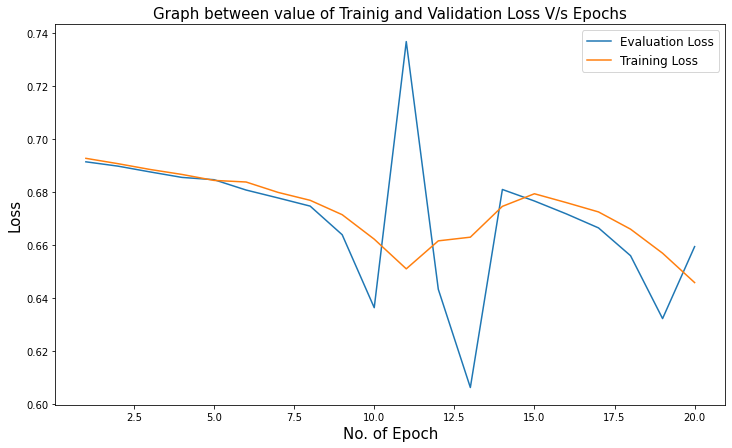



__________________________________________________




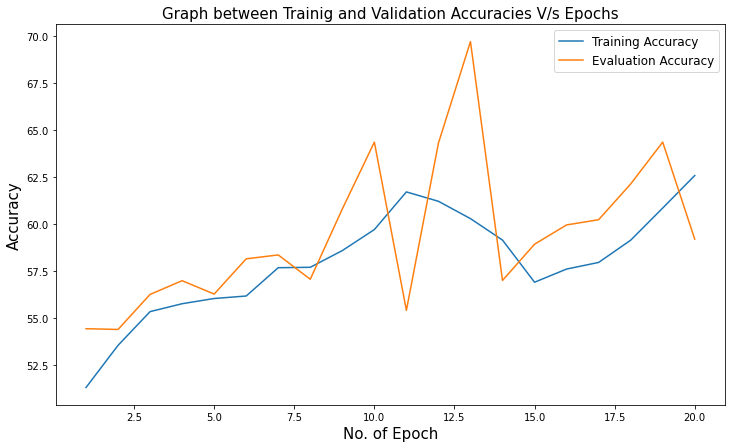

In [ ]:
GraphicalFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

Maximum validation accuracy observed was around 70%.

# **Exercise 2:**

For each of the experiment listed below, submit the graphs between training accuracy, validation accuracy vs epochs and training loss, validation loss vs epochs for each hyper-parameter as **scribes**-

# **1.**
Run the above LSTM model with ADAM optimizer with default parameter settings,  for atleast 100 epochs and submit the graphs as instructed above. Write your observations.

# **2.**

With ADAM optimizer, increase the number of layers in LSTM to $[2,3,4]$. For each of the given values, set Bi-directional as FALSE for one time and TRUE for another (two subproblems for each value). Also implement **early stopping** condition with patience value of **3** for each and submit the graphs as scribes. Comment on observations.



###1. Using Adam Optimizer

In [ ]:
model = RNN(INPUT_DIM, EMBEDDING_DIM,  HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX)
model = model.to(device)
model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)
optimizer = torch.optim.Adam(model.parameters())

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [ ]:
N_EPOCHS = 100

best_valid_loss = float('inf')
prev_epoch_valid_loss = float('inf')
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []
patience = 3
i = 0
max_epochs = 100

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc*100)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc*100)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, valid_loss))
        torch.save(model.state_dict(), 'tut1-model.pt')

    if valid_loss_list[-1]<prev_epoch_valid_loss:
      i = 0
      prev_epoch_valid_loss = valid_loss_list[-1]

    else:
      i = i + 1
      prev_epoch_valid_loss = valid_loss_list[-1]

    if epoch >= max_epochs:
      print("Max Epochs reached")
      print("Returning the model with best parameters")
      break

Epoch: 01 | Epoch Time: 0m 9s
	Train Loss: 0.659 | Train Acc: 60.07%
	 Val. Loss: 0.568 |  Val. Acc: 71.69%
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.56757393
Epoch: 02 | Epoch Time: 0m 8s
	Train Loss: 0.607 | Train Acc: 67.80%
	 Val. Loss: 0.632 |  Val. Acc: 61.11%
Epoch: 03 | Epoch Time: 0m 8s
	Train Loss: 0.551 | Train Acc: 72.87%
	 Val. Loss: 0.473 |  Val. Acc: 78.80%
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.47250264
Epoch: 04 | Epoch Time: 0m 8s
	Train Loss: 0.459 | Train Acc: 79.19%
	 Val. Loss: 0.392 |  Val. Acc: 83.51%
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.39237632
Epoch: 05 | Epoch Time: 0m 8s
	Train Loss: 0.326 | Train Acc: 86.32%
	 Val. Loss: 0.325 |  Val. Acc: 86.94%
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.32487030
Epoch: 06 | Epoch Time: 0m 8s
	Train Loss: 0.266 | Train Acc: 89.13%
	 Val. Loss: 0.316 |  Val. Acc: 88.22%
Saving the model state dictionar

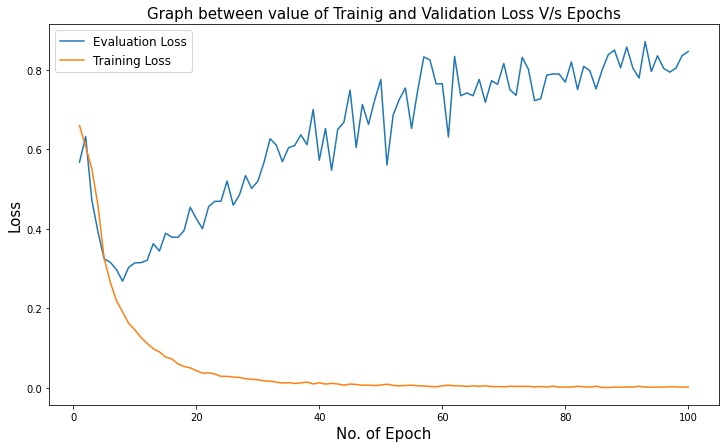



__________________________________________________




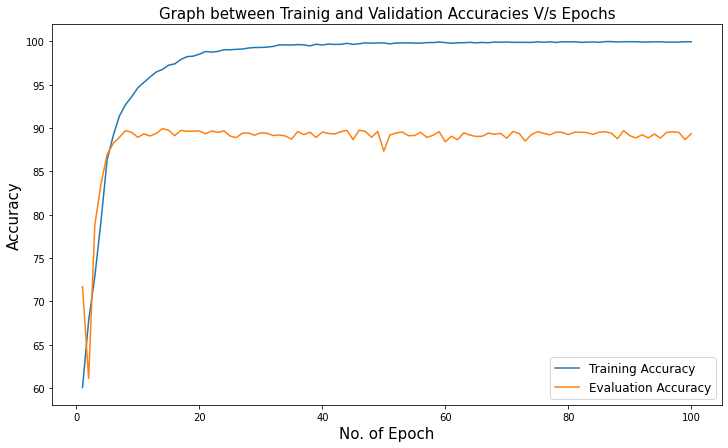

In [ ]:
GraphicalFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

In [ ]:
TabularFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.659391,60.072341,0.567574,71.689619
1,2,0.606927,67.797673,0.631790,61.114054
2,3,0.551192,72.867245,0.472503,78.804732
3,4,0.459128,79.189748,0.392376,83.505473
4,5,0.326213,86.324459,0.324870,86.939442
...,...,...,...,...,...
95,96,0.002244,99.903057,0.803388,89.499470
96,97,0.002830,99.908759,0.793759,89.552436
97,98,0.002777,99.908759,0.803860,89.486229
98,99,0.001798,99.948677,0.835206,88.665254


The validation loss first decreases and then increases with epochs indicating overfitting. The validation accuracy first increases and then settles around 90%. Thus, Adam turns out to be a better optimiser compared to SGD.

###2. Changing the no of layers and bidirectionality

####2 Layer LSTM

In [ ]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers,
                 bidirectional, dropout, pad_idx):

        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)

        self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, dropout=dropout)


        self.fc = nn.Linear(hidden_dim * n_layers, output_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, text, text_lengths):

        #text = [sent len, batch size]

        embedded = self.dropout(self.embedding(text))

        #embedded = [sent len, batch size, emb dim]

        #pack sequence
        # lengths need to be on CPU!
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.to('cpu'))

        packed_output, (hidden, cell) = self.rnn(packed_embedded)


        #unpack sequence
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)

        #output = [sent len, batch size, hid dim * num directions]
        #output over padding tokens are zero tensors

        #hidden = [num layers * num directions, batch size, hid dim]
        #cell = [num layers * num directions, batch size, hid dim]

        #concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers
        #and apply dropout

        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))

        #hidden = [batch size, hid dim * num directions]

        return self.fc(hidden)

In [ ]:
model = RNN(INPUT_DIM, EMBEDDING_DIM,  HIDDEN_DIM, OUTPUT_DIM, 2, False, DROPOUT, PAD_IDX)
model = model.to(device)
model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
N_EPOCHS = 20

best_valid_loss = float('inf')
prev_epoch_valid_loss = float('inf')
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []
patience = 3
i = 0
max_epochs = 50

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc*100)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc*100)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, valid_loss))
        torch.save(model.state_dict(), 'tut1-model.pt')

    if valid_loss_list[-1]<prev_epoch_valid_loss:
      i = 0
      prev_epoch_valid_loss = valid_loss_list[-1]

    else:
      i = i + 1
      prev_epoch_valid_loss = valid_loss_list[-1]

    if i>=patience:
      print("Early Stopping")
      print("Returning the model with best parameters")
      break
    if epoch >= max_epochs:
      print("Max Epochs reached")
      print("Returning the model with best parameters")
      break

Epoch: 01 | Epoch Time: 0m 17s
	Train Loss: 0.660 | Train Acc: 59.47%
	 Val. Loss: 0.626 |  Val. Acc: 66.67%
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.62616633
Epoch: 02 | Epoch Time: 0m 17s
	Train Loss: 0.620 | Train Acc: 65.50%
	 Val. Loss: 0.554 |  Val. Acc: 72.58%
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.55368945
Epoch: 03 | Epoch Time: 0m 17s
	Train Loss: 0.548 | Train Acc: 72.24%
	 Val. Loss: 0.456 |  Val. Acc: 79.03%
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.45643439
Epoch: 04 | Epoch Time: 0m 18s
	Train Loss: 0.409 | Train Acc: 82.23%
	 Val. Loss: 0.356 |  Val. Acc: 85.36%
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.35599458
Epoch: 05 | Epoch Time: 0m 17s
	Train Loss: 0.380 | Train Acc: 84.02%
	 Val. Loss: 1.157 |  Val. Acc: 50.12%
Epoch: 06 | Epoch Time: 0m 17s
	Train Loss: 0.392 | Train Acc: 82.15%
	 Val. Loss: 0.312 |  Val. Acc: 88.00%
Saving the model state dic

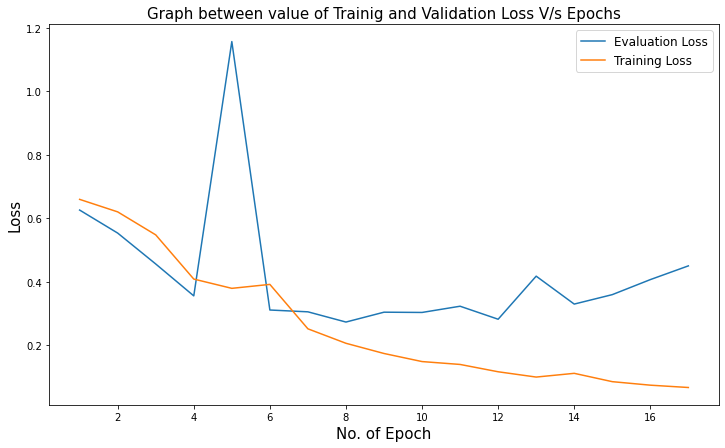



__________________________________________________




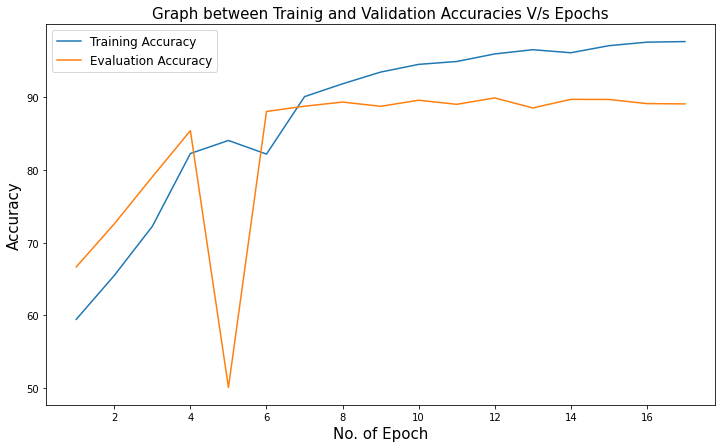

In [ ]:
GraphicalFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

In [ ]:
TabularFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.659825,59.472758,0.626166,66.671081
1,2,0.620467,65.495471,0.553689,72.576801
2,3,0.548065,72.236705,0.456434,79.029838
3,4,0.408934,82.229210,0.355995,85.363701
4,5,0.379709,84.015739,1.156586,50.119174
5,6,0.392152,82.146930,0.311518,87.998764
6,7,0.252271,90.031120,0.305790,88.718220
7,8,0.206767,91.793209,0.273611,89.287606
8,9,0.174625,93.400515,0.304656,88.704979
9,10,0.149198,94.459561,0.303829,89.539195


Early stopping after 17 epochs with validation accuracy almost reaching 90%.

####2 Layer Bidirectional

In [ ]:
model = RNN(INPUT_DIM, EMBEDDING_DIM,  HIDDEN_DIM, OUTPUT_DIM, 2, True, DROPOUT, PAD_IDX)
model = model.to(device)
model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
N_EPOCHS = 20

best_valid_loss = float('inf')
prev_epoch_valid_loss = float('inf')
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []
patience = 3
i = 0
max_epochs = 50

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc*100)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc*100)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, valid_loss))
        torch.save(model.state_dict(), 'tut1-model.pt')

    if valid_loss_list[-1]<prev_epoch_valid_loss:
      i = 0
      prev_epoch_valid_loss = valid_loss_list[-1]

    else:
      i = i + 1
      prev_epoch_valid_loss = valid_loss_list[-1]

    if i>=patience:
      print("Early Stopping")
      print("Returning the model with best parameters")
      break
    if epoch >= max_epochs:
      print("Max Epochs reached")
      print("Returning the model with best parameters")
      break

Epoch: 01 | Epoch Time: 0m 37s
	Train Loss: 0.663 | Train Acc: 59.38%
	 Val. Loss: 0.695 |  Val. Acc: 49.29%
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.69489400
Epoch: 02 | Epoch Time: 0m 38s
	Train Loss: 0.676 | Train Acc: 57.48%
	 Val. Loss: 0.689 |  Val. Acc: 54.86%
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.68923282
Epoch: 03 | Epoch Time: 0m 38s
	Train Loss: 0.675 | Train Acc: 57.11%
	 Val. Loss: 0.650 |  Val. Acc: 61.92%
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.64992515
Epoch: 04 | Epoch Time: 0m 38s
	Train Loss: 0.634 | Train Acc: 63.76%
	 Val. Loss: 0.605 |  Val. Acc: 67.00%
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.60454243
Epoch: 05 | Epoch Time: 0m 38s
	Train Loss: 0.561 | Train Acc: 71.29%
	 Val. Loss: 0.546 |  Val. Acc: 73.30%
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.54566320
Epoch: 06 | Epoch Time: 0m 38s
	Train Loss: 0.426 | Tra

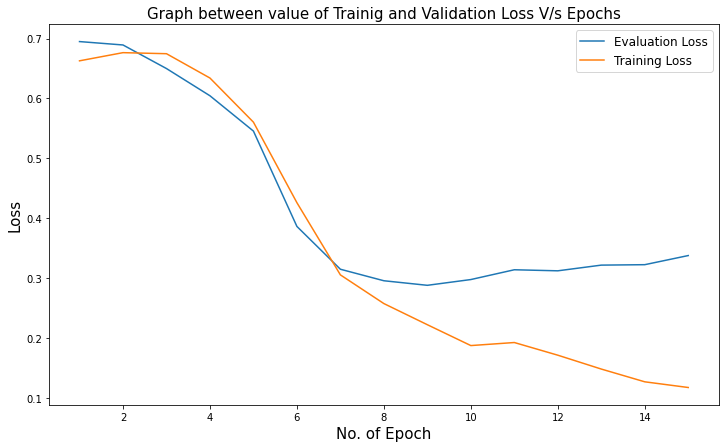



__________________________________________________




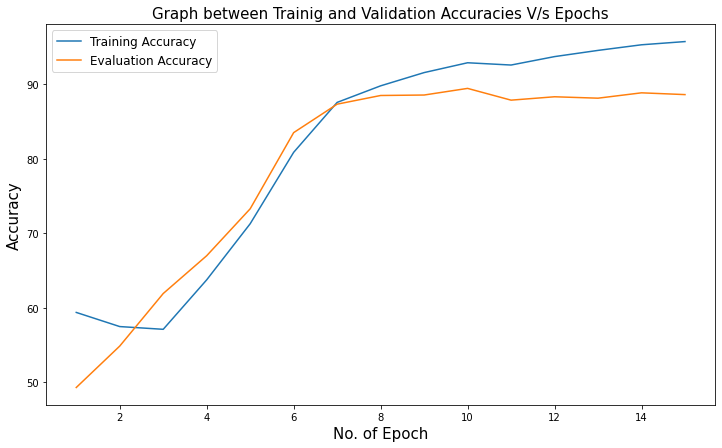

In [ ]:
GraphicalFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

In [ ]:
TabularFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.662807,59.378259,0.694894,49.293785
1,2,0.676423,57.479308,0.689233,54.859640
2,3,0.674678,57.111086,0.649925,61.917373
3,4,0.634123,63.757006,0.604542,66.997705
4,5,0.560536,71.291710,0.545663,73.300671
5,6,0.426300,80.885037,0.386713,83.531956
6,7,0.305958,87.592056,0.315361,87.354343
7,8,0.258126,89.816052,0.296172,88.519597
8,9,0.222881,91.595249,0.288570,88.581391
9,10,0.188113,92.915798,0.298179,89.472987


Early stopping after 15 epochs with validation accuracy almost reaching 90%.

####3 Layer LSTM

In [ ]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers,
                 bidirectional, dropout, pad_idx):

        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)

        self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, dropout=dropout)


        self.fc = nn.Linear(hidden_dim * n_layers, output_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, text, text_lengths):

        #text = [sent len, batch size]

        embedded = self.dropout(self.embedding(text))

        #embedded = [sent len, batch size, emb dim]

        #pack sequence
        # lengths need to be on CPU!
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.to('cpu'))

        packed_output, (hidden, cell) = self.rnn(packed_embedded)


        #unpack sequence
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)

        #output = [sent len, batch size, hid dim * num directions]
        #output over padding tokens are zero tensors

        #hidden = [num layers * num directions, batch size, hid dim]
        #cell = [num layers * num directions, batch size, hid dim]

        #concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers
        #and apply dropout

        hidden = self.dropout(torch.cat((hidden[-3,:,:], hidden[-2,:,:], hidden[-1,:,:]), dim = 1))

        #hidden = [batch size, hid dim * num directions]

        return self.fc(hidden)

In [ ]:
model = RNN(INPUT_DIM, EMBEDDING_DIM,  HIDDEN_DIM, OUTPUT_DIM, 3, False, DROPOUT, PAD_IDX)
model = model.to(device)
model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
N_EPOCHS = 20

best_valid_loss = float('inf')
prev_epoch_valid_loss = float('inf')
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []
patience = 3
i = 0
max_epochs = 50

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc*100)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc*100)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, valid_loss))
        torch.save(model.state_dict(), 'tut1-model.pt')

    if valid_loss_list[-1]<prev_epoch_valid_loss:
      i = 0
      prev_epoch_valid_loss = valid_loss_list[-1]

    else:
      i = i + 1
      prev_epoch_valid_loss = valid_loss_list[-1]

    if i>=patience:
      print("Early Stopping")
      print("Returning the model with best parameters")
      break
    if epoch >= max_epochs:
      print("Max Epochs reached")
      print("Returning the model with best parameters")
      break

Epoch: 01 | Epoch Time: 0m 28s
	Train Loss: 0.686 | Train Acc: 55.86%
	 Val. Loss: 0.646 |  Val. Acc: 63.82%
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.64583399
Epoch: 02 | Epoch Time: 0m 28s
	Train Loss: 0.597 | Train Acc: 68.32%
	 Val. Loss: 0.496 |  Val. Acc: 76.96%
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.49612046
Epoch: 03 | Epoch Time: 0m 28s
	Train Loss: 0.488 | Train Acc: 77.30%
	 Val. Loss: 0.465 |  Val. Acc: 80.08%
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.46486401
Epoch: 04 | Epoch Time: 0m 28s
	Train Loss: 0.386 | Train Acc: 83.20%
	 Val. Loss: 0.344 |  Val. Acc: 85.90%
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.34411481
Epoch: 05 | Epoch Time: 0m 28s
	Train Loss: 0.316 | Train Acc: 87.15%
	 Val. Loss: 0.318 |  Val. Acc: 86.79%
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.31821359
Epoch: 06 | Epoch Time: 0m 28s
	Train Loss: 0.266 | Tra

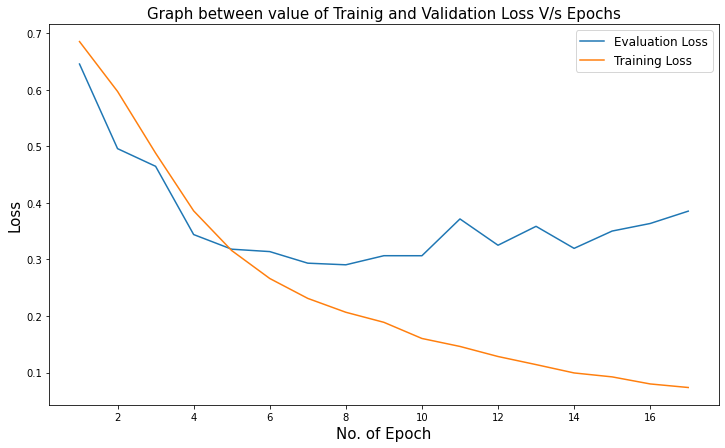



__________________________________________________




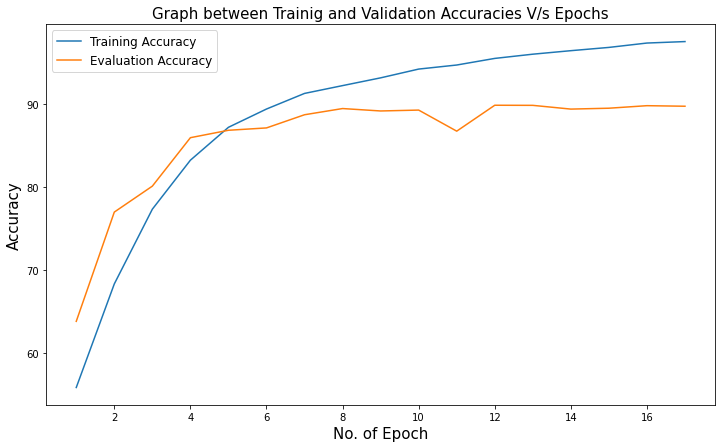

In [ ]:
GraphicalFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

In [ ]:
TabularFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.685565,55.858153,0.645834,63.815325
1,2,0.597342,68.316606,0.496120,76.955332
2,3,0.488179,77.304647,0.464864,80.075918
3,4,0.386032,83.196200,0.344115,85.902189
4,5,0.315804,87.151330,0.318214,86.793785
5,6,0.266393,89.348442,0.313974,87.076271
6,7,0.231158,91.226212,0.293474,88.660840
7,8,0.206621,92.165504,0.290597,89.406780
8,9,0.188841,93.098279,0.306694,89.115466
9,10,0.160251,94.153252,0.306641,89.221398


Early stopping after 17 epochs with validation accuracy almost reaching 90%.

####3 Layer Bidirectional

In [ ]:
model = RNN(INPUT_DIM, EMBEDDING_DIM,  HIDDEN_DIM, OUTPUT_DIM, 3, True, DROPOUT, PAD_IDX)
model = model.to(device)
model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
N_EPOCHS = 20

best_valid_loss = float('inf')
prev_epoch_valid_loss = float('inf')
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []
patience = 3
i = 0
max_epochs = 50

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc*100)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc*100)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, valid_loss))
        torch.save(model.state_dict(), 'tut1-model.pt')

    if valid_loss_list[-1]<prev_epoch_valid_loss:
      i = 0
      prev_epoch_valid_loss = valid_loss_list[-1]

    else:
      i = i + 1
      prev_epoch_valid_loss = valid_loss_list[-1]

    if i>=patience:
      print("Early Stopping")
      print("Returning the model with best parameters")
      break
    if epoch >= max_epochs:
      print("Max Epochs reached")
      print("Returning the model with best parameters")
      break

Epoch: 01 | Epoch Time: 0m 57s
	Train Loss: 0.672 | Train Acc: 58.28%
	 Val. Loss: 0.587 |  Val. Acc: 70.60%
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.58737825
Epoch: 02 | Epoch Time: 1m 1s
	Train Loss: 0.542 | Train Acc: 73.20%
	 Val. Loss: 0.510 |  Val. Acc: 78.05%
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.50970370
Epoch: 03 | Epoch Time: 1m 1s
	Train Loss: 0.532 | Train Acc: 73.48%
	 Val. Loss: 0.499 |  Val. Acc: 71.19%
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.49921595
Epoch: 04 | Epoch Time: 1m 1s
	Train Loss: 0.387 | Train Acc: 83.06%
	 Val. Loss: 0.357 |  Val. Acc: 84.67%
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.35729340
Epoch: 05 | Epoch Time: 1m 0s
	Train Loss: 0.294 | Train Acc: 88.08%
	 Val. Loss: 0.318 |  Val. Acc: 87.99%
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.31833005
Epoch: 06 | Epoch Time: 1m 1s
	Train Loss: 0.256 | Train Ac

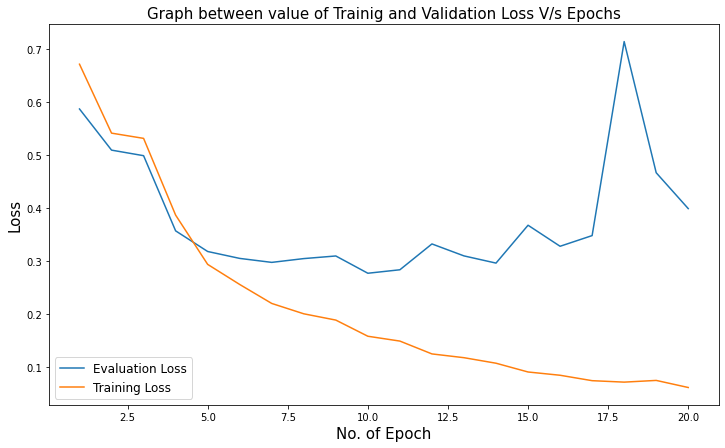



__________________________________________________




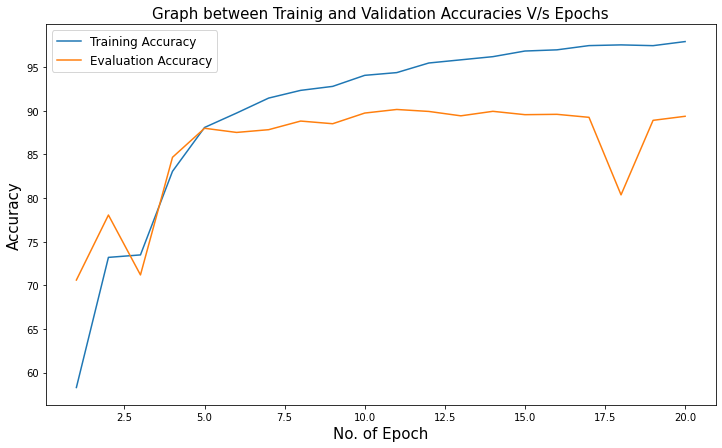

In [ ]:
GraphicalFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

In [ ]:
TabularFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.671913,58.283368,0.587378,70.599400
1,2,0.541779,73.196363,0.509704,78.049965
2,3,0.531912,73.479862,0.499216,71.186441
3,4,0.387009,83.058525,0.357293,84.666314
4,5,0.294007,88.084919,0.318330,87.994350
5,6,0.256068,89.737031,0.305282,87.517655
6,7,0.220242,91.452685,0.297771,87.831038
7,8,0.200687,92.338210,0.304932,88.819739
8,9,0.188826,92.795229,0.309867,88.515184
9,10,0.158315,94.060382,0.277259,89.737818


Early stopping after 20 epochs with validation accuracy just crossing 90%.

####4 Layer LSTM

In [ ]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers,
                 bidirectional, dropout, pad_idx):

        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)

        self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, dropout=dropout)


        self.fc = nn.Linear(hidden_dim * n_layers, output_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, text, text_lengths):

        #text = [sent len, batch size]

        embedded = self.dropout(self.embedding(text))

        #embedded = [sent len, batch size, emb dim]

        #pack sequence
        # lengths need to be on CPU!
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.to('cpu'))

        packed_output, (hidden, cell) = self.rnn(packed_embedded)


        #unpack sequence
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)

        #output = [sent len, batch size, hid dim * num directions]
        #output over padding tokens are zero tensors

        #hidden = [num layers * num directions, batch size, hid dim]
        #cell = [num layers * num directions, batch size, hid dim]

        #concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers
        #and apply dropout

        hidden = self.dropout(torch.cat((hidden[-4,:,:], hidden[-3,:,:], hidden[-2,:,:], hidden[-1,:,:]), dim = 1))

        #hidden = [batch size, hid dim * num directions]

        return self.fc(hidden)

In [ ]:
model = RNN(INPUT_DIM, EMBEDDING_DIM,  HIDDEN_DIM, OUTPUT_DIM, 4, False, DROPOUT, PAD_IDX)
model = model.to(device)
model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
N_EPOCHS = 20

best_valid_loss = float('inf')
prev_epoch_valid_loss = float('inf')
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []
patience = 3
i = 0

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc*100)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc*100)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, valid_loss))
        torch.save(model.state_dict(), 'tut1-model.pt')

    if valid_loss_list[-1]<prev_epoch_valid_loss:
      i = 0
      prev_epoch_valid_loss = valid_loss_list[-1]

    else:
      i = i + 1
      prev_epoch_valid_loss = valid_loss_list[-1]

    if i>=patience:
      print("Early Stopping")
      print("Returning the model with best parameters")
      break

Epoch: 01 | Epoch Time: 0m 38s
	Train Loss: 0.684 | Train Acc: 56.58%
	 Val. Loss: 0.589 |  Val. Acc: 68.99%
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.58877895
Epoch: 02 | Epoch Time: 0m 38s
	Train Loss: 0.611 | Train Acc: 66.52%
	 Val. Loss: 0.653 |  Val. Acc: 63.40%
Epoch: 03 | Epoch Time: 0m 38s
	Train Loss: 0.537 | Train Acc: 73.76%
	 Val. Loss: 0.422 |  Val. Acc: 82.62%
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.42177950
Epoch: 04 | Epoch Time: 0m 38s
	Train Loss: 0.350 | Train Acc: 85.68%
	 Val. Loss: 0.304 |  Val. Acc: 87.72%
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.30415554
Epoch: 05 | Epoch Time: 0m 38s
	Train Loss: 0.275 | Train Acc: 89.25%
	 Val. Loss: 0.281 |  Val. Acc: 88.65%
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.28075158
Epoch: 06 | Epoch Time: 0m 38s
	Train Loss: 0.240 | Train Acc: 90.76%
	 Val. Loss: 0.277 |  Val. Acc: 89.36%
Saving the model state dic

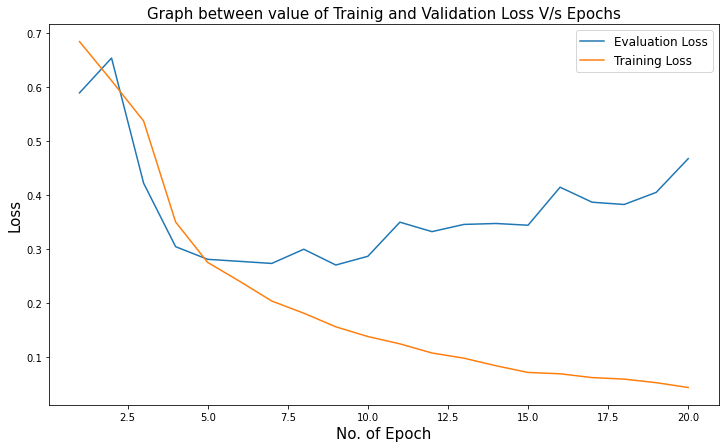



__________________________________________________




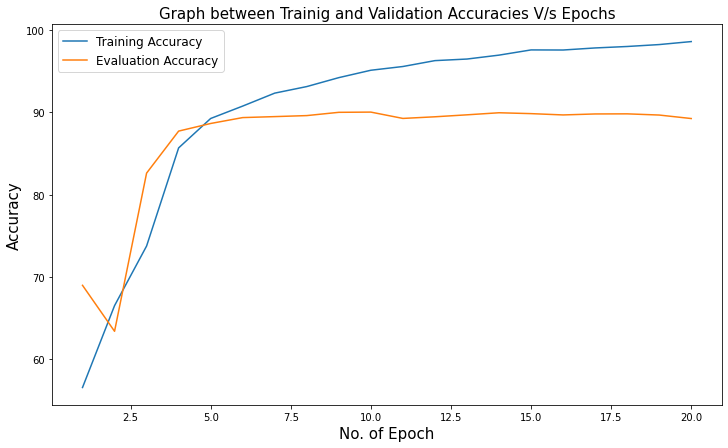

In [ ]:
GraphicalFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

Model trained for full 20 epochs with validation accuracy reaching 90%.

####4 Layer Bidirectional

In [ ]:
model = RNN(INPUT_DIM, EMBEDDING_DIM,  HIDDEN_DIM, OUTPUT_DIM, 4, True, DROPOUT, PAD_IDX)
model = model.to(device)
model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
N_EPOCHS = 20

best_valid_loss = float('inf')
prev_epoch_valid_loss = float('inf')
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []
patience = 3
i = 0
max_epochs = 50

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc*100)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc*100)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, valid_loss))
        torch.save(model.state_dict(), 'tut1-model.pt')

    if valid_loss_list[-1]<prev_epoch_valid_loss:
      i = 0
      prev_epoch_valid_loss = valid_loss_list[-1]

    else:
      i = i + 1
      prev_epoch_valid_loss = valid_loss_list[-1]

    if i>=patience:
      print("Early Stopping")
      print("Returning the model with best parameters")
      break
    if epoch >= max_epochs:
      print("Max Epochs reached")
      print("Returning the model with best parameters")
      break

Epoch: 01 | Epoch Time: 1m 24s
	Train Loss: 0.679 | Train Acc: 56.71%
	 Val. Loss: 0.694 |  Val. Acc: 49.15%
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.69414578
Epoch: 02 | Epoch Time: 1m 24s
	Train Loss: 0.693 | Train Acc: 51.44%
	 Val. Loss: 0.694 |  Val. Acc: 50.85%
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.69410601
Epoch: 03 | Epoch Time: 1m 27s
	Train Loss: 0.662 | Train Acc: 60.11%
	 Val. Loss: 0.631 |  Val. Acc: 65.09%
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.63128006
Epoch: 04 | Epoch Time: 1m 30s
	Train Loss: 0.517 | Train Acc: 74.66%
	 Val. Loss: 0.370 |  Val. Acc: 83.98%
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.37036775
Epoch: 05 | Epoch Time: 1m 26s
	Train Loss: 0.332 | Train Acc: 86.45%
	 Val. Loss: 0.335 |  Val. Acc: 86.69%
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.33486801
Epoch: 06 | Epoch Time: 1m 25s
	Train Loss: 0.265 | Tra

In [ ]:
TabularFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.678857,56.712722,0.694146,49.148129
1,2,0.692849,51.438673,0.694106,50.851872
2,3,0.662272,60.113074,0.631280,65.090925
3,4,0.516906,74.658661,0.370368,83.977754
4,5,0.331947,86.447471,0.334868,86.687853
5,6,0.264896,89.644975,0.293138,88.824153
6,7,0.223967,91.411138,0.264601,89.640713
7,8,0.198189,92.585050,0.263733,89.446504
8,9,0.170557,93.628617,0.324748,90.002648
9,10,0.149506,94.490517,0.305726,89.605403


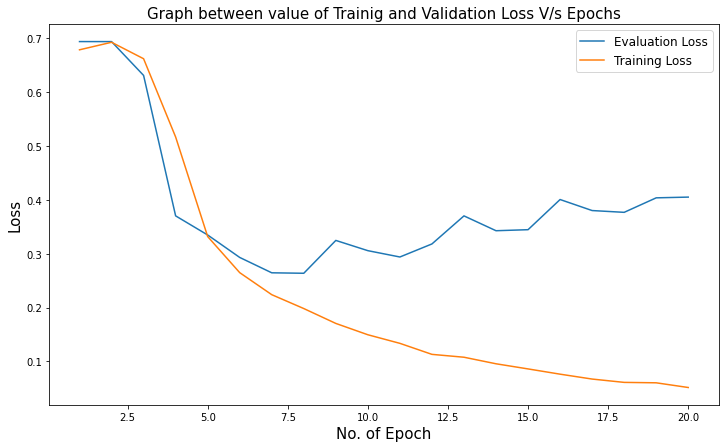



__________________________________________________




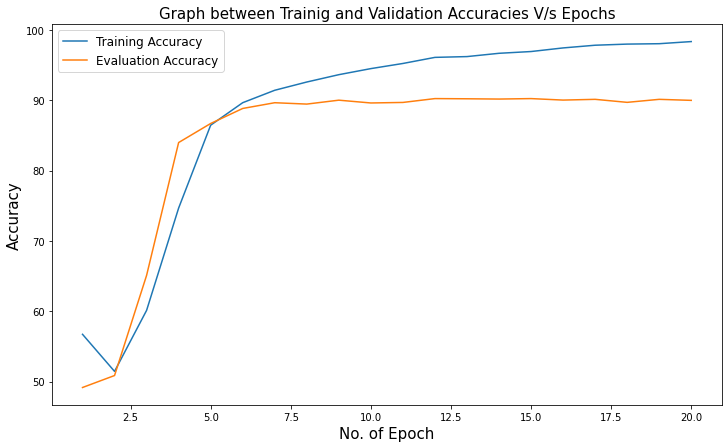

In [ ]:
GraphicalFormat(epoch+1,train_loss_list,train_acc_list,valid_loss_list,valid_acc_list)

Model trained for full 20 epochs with validation accuracy reaching 90%.

####Observations

For all the models, validation accuracy is around 90%. However for 4 layer LSTMs, early stopping didn't occur implying relatively low overfitting.